In [340]:
import pandas as pd
import matplotlib.pyplot as plt

clean_file = "Coronavirus_20200101_20200409_clean.csv"
clean_expert_file = "Coronavirus_20200101_20200409_clean_expert.csv"

In [341]:
import textstat

In [342]:
US_January_April_text_df_appended_date_clean = pd.read_csv(clean_file)
US_January_April_text_df_appended_date_clean_expert = pd.read_csv(clean_expert_file)

In [343]:
US_January_April_text_df_appended_date_clean['language'].value_counts()

en    123764
es       561
fr       245
it         3
de         3
ru         2
tr         1
no         1
Name: language, dtype: int64

In [344]:
US_January_April_text_df_appended_date_clean['Expert_Mention'].value_counts()

0    113204
1     11395
Name: Expert_Mention, dtype: int64

In [ ]:
media_names = US_January_April_text_df_appended_date_clean_en['media_name']
counts = media_names.value_counts()
percent = media_names.value_counts(normalize=True)
percent100 = media_names.value_counts(normalize=True).mul(100).round(1)#.astype(str) + '%'

media_names = pd.DataFrame({'n': counts, 'percent': percent100}).reset_index()
media_names = media_names.rename(columns={"index": "media_name"})
media_names

In [ ]:
media_names_expert = US_January_April_text_df_appended_date_clean_expert_en['media_name']
counts_expert = media_names_expert.value_counts()
percent_expert = media_names_expert.value_counts(normalize=True)
percent100_expert = media_names_expert.value_counts(normalize=True).mul(100).round(1)#.astype(str) + '%'

media_names_expert = pd.DataFrame({'expert_n': counts_expert, 'expert_percent': percent100_expert}).reset_index()
media_names_expert = media_names_expert.rename(columns={"index": "media_name"})
media_names_expert

In [ ]:
media_names_non_expert = US_January_April_text_df_appended_date_clean_non_expert_en['media_name']
counts_non_expert = media_names_non_expert.value_counts()
percent_non_expert = media_names_non_expert.value_counts(normalize=True)
percent100_non_expert = media_names_non_expert.value_counts(normalize=True).mul(100).round(1)#.astype(str) + '%'

media_names_non_expert = pd.DataFrame({'non_expert_n': counts_non_expert, 'non_expert_percent': percent100_non_expert}).reset_index()
media_names_non_expert = media_names_non_expert.rename(columns={"index": "media_name"})
media_names_non_expert

In [ ]:
media_expert_non_expert = pd.merge(media_names_expert, media_names_non_expert, how='right', on='media_name')

In [ ]:
media_names_expert['Expertise'] = 'Expert'
media_names_non_expert['Expertise'] = 'Non-expert'

In [ ]:
media_names_expert = media_names_expert.rename(columns={"expert_n": "n", "expert_percent": "percent"})

In [ ]:
media_names_non_expert = media_names_non_expert.rename(columns={"non_expert_n": "n", "non_expert_percent": "percent"})

In [ ]:
media_expertise_counts = pd.concat([media_names_non_expert,media_names_expert], axis=0, ignore_index=True)

In [ ]:
import seaborn as sns
from matplotlib import rc
rc("text", usetex=False)

sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(25,12))
plt.xticks(rotation=90)
ax = sns.barplot(x="media_name", y="n", hue="Expertise", data=media_expertise_counts)

plt.ylabel('Number of news articles',fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlabel('News media name',fontsize=30)
plt.title('Number of news articles per media - January 1st to April 9, 2020',fontsize=30)

num_news_article_per_media = 'Number_News_Article_Per_News_Media.png'
plt.savefig(num_news_article_per_media, bbox_inches='tight', transparent=False, dpi=1000)

#plt.show()

In [ ]:
import seaborn as sns
from matplotlib import rc
rc("text", usetex=False)

sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(25,12))
plt.xticks(rotation=90)
ax = sns.barplot(x="media_name", y="expert_percent", color='orange', data=media_names_expert)
plt.ylabel('Percentage contributed',fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlabel('News media name',fontsize=30)
plt.title('Expertise mentions in news articles per media - January 1st to April 9, 2020',fontsize=30)

percent_expert_per_media = 'Percentage_Expert_Per_Media.png'
plt.savefig(percent_expert_per_media, bbox_inches='tight', transparent=False, dpi=1000)

#plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(25,12))
plt.xticks(rotation=90)
ax = sns.barplot(x="media_name", y="non_expert_percent", color='blue', data=media_names_non_expert)
plt.ylabel('Percentage contributed',fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlabel('News media name',fontsize=30)
plt.title('Absence of expert mentions in news articles per media - January 1st to April 9, 2020',fontsize=30)

percent_expert_per_media = 'Percentage_Non_Expert_Per_Media.png'
plt.savefig(percent_expert_per_media, bbox_inches='tight', transparent=False, dpi=1000)

#plt.show()

In [ ]:
# Expert vs. non-expert



In [346]:
US_January_April_text_df_appended_date_clean_en = US_January_April_text_df_appended_date_clean[US_January_April_text_df_appended_date_clean['language'] == 'en'].reset_index()

In [347]:
def overall_readability(text):
    return(textstat.text_standard(text, float_output=False))

In [348]:
#US_January_April_text_df_appended_date_clean_en['Overall_Readability'] = US_January_April_text_df_appended_date_clean_en['Text'].apply(overall_readability)

In [349]:
def overall_readability_float(text):
    return(textstat.text_standard(text, float_output=True))

In [350]:
US_January_April_text_df_appended_date_clean_en['Overall_Readability_Float'] = US_January_April_text_df_appended_date_clean_en['Text'].apply(overall_readability_float)

In [351]:
US_January_April_text_df_appended_date_clean_en['Overall_Readability_Float'].describe()

count    123764.000000
mean         13.989941
std           4.445500
min          -1.000000
25%          12.000000
50%          14.000000
75%          16.000000
max         273.000000
Name: Overall_Readability_Float, dtype: float64

In [353]:
#US_January_April_text_df_appended_date_clean_en['Overall_Readability'].value_counts()/US_January_April_text_df_appended_date_clean_en.shape[0]

In [354]:
def syllable_count(text):
    return(textstat.syllable_count(text))

def lexicon_count(text):
    return(textstat.lexicon_count(text))

def sentence_count(text):
    return(textstat.sentence_count(text))

In [355]:
US_January_April_text_df_appended_date_clean_en['textstat_syllable_count'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(syllable_count)
US_January_April_text_df_appended_date_clean_en['textstat_lexicon_count'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(lexicon_count)
US_January_April_text_df_appended_date_clean_en['textstat_sentence_count'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(sentence_count)

In [407]:
def dale_chall_readability_score(text):
    return(textstat.dale_chall_readability_score(text))

def linsear_write_formula(text):
    return(textstat.linsear_write_formula(text))

def gunning_fog(text):
    return(textstat.gunning_fog(text))

def smog_index(text):
    return(textstat.smog_index(text))

def automated_readability_index(text):
    return(textstat.automated_readability_index(text))

def coleman_liau_index(text):
    return(textstat.coleman_liau_index(text))

def flesch_reading_ease(text):
    return(textstat.flesch_reading_ease(text))

def flesch_kincaid_grade(text):
    return(textstat.flesch_kincaid_grade(text))

In [357]:
US_January_April_text_df_appended_date_clean_en['dale_chall_readability_score'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(dale_chall_readability_score)

In [358]:
US_January_April_text_df_appended_date_clean_en['linsear_write_formula'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(linsear_write_formula)

In [359]:
US_January_April_text_df_appended_date_clean_en['gunning_fog'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(gunning_fog)

In [360]:
US_January_April_text_df_appended_date_clean_en['smog_index'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(smog_index)

In [361]:
US_January_April_text_df_appended_date_clean_en['automated_readability_index'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(automated_readability_index)


In [362]:
US_January_April_text_df_appended_date_clean_en['coleman_liau_index'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(coleman_liau_index)

In [363]:
US_January_April_text_df_appended_date_clean_en['flesch_reading_ease'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(flesch_reading_ease)

In [364]:
US_January_April_text_df_appended_date_clean_en['flesch_kincaid_grade'] =  US_January_April_text_df_appended_date_clean_en['Text'].apply(flesch_kincaid_grade)

In [365]:
US_January_April_text_df_appended_date_clean_en['flesch_kincaid_grade'].describe()

count    123764.000000
mean         13.716133
std           4.979033
min          -3.500000
25%          11.200000
50%          13.200000
75%          15.500000
max         272.800000
Name: flesch_kincaid_grade, dtype: float64

In [366]:
US_January_April_text_df_appended_date_clean_expert_en = US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention'] == 1]

In [367]:
cols=US_January_April_text_df_appended_date_clean_expert_en.columns[1:]
US_January_April_text_df_appended_date_clean_expert_en=US_January_April_text_df_appended_date_clean_expert_en[cols]
US_January_April_text_df_appended_date_clean_expert_en=US_January_April_text_df_appended_date_clean_expert_en.reset_index()

In [373]:
cols

Index(['index', 'stories_id', 'publish_date', 'title', 'url', 'language',
       'ap_syndicated', 'themes', 'media_id', 'media_name', 'media_url',
       'Text', 'not_available', 'Id', 'num_sen', 'num_word',
       'avg_word_per_sen', 'frac_words_noun', 'frac_words_verb',
       'avg_polarity_score_negative', 'avg_polarity_score_neutral',
       'avg_polarity_score_positive', 'avg_polarity_score_compound',
       'Expert_Mention', 'Expert_Mention_List', 'Expert_Mention_Sentence_List',
       'quantile_num_word_5', 'quantile_num_word_10', 'quantile_num_word_15',
       'quantile_num_word_20', 'quantile_log_num_word_5',
       'quantile_log_num_word_10', 'quantile_log_num_word_15',
       'quantile_log_num_word_20', 'Method_1_case', 'Method_1_cases',
       'Method_2_case', 'Method_2_cases', 'Method_3_case', 'Method_3_cases',
       'Method_1_death', 'Method_1_deaths', 'Method_2_death',
       'Method_2_deaths', 'Method_3_death', 'Method_3_deaths',
       'Method_2_case_min', 'Method_2_c

In [374]:
US_January_April_text_df_appended_date_clean_expert_en['flesch_kincaid_grade'].describe()

count    11392.000000
mean        14.043732
std          3.254833
min          3.800000
25%         12.000000
50%         13.700000
75%         15.500000
max         49.000000
Name: flesch_kincaid_grade, dtype: float64

In [375]:
US_January_April_text_df_appended_date_clean_non_expert_en = US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention'] == 0]

In [376]:
cols=US_January_April_text_df_appended_date_clean_non_expert_en.columns[1:]
US_January_April_text_df_appended_date_clean_non_expert_en=US_January_April_text_df_appended_date_clean_non_expert_en[cols]
US_January_April_text_df_appended_date_clean_non_expert_en=US_January_April_text_df_appended_date_clean_non_expert_en.reset_index()

In [377]:
US_January_April_text_df_appended_date_clean_non_expert_en['flesch_kincaid_grade'].describe()

count    112372.000000
mean         13.682922
std           5.120365
min          -3.500000
25%          11.100000
50%          13.200000
75%          15.500000
max         272.800000
Name: flesch_kincaid_grade, dtype: float64

In [378]:
US_January_April_text_df_appended_date_clean.shape

(124599, 81)

In [379]:
US_January_April_text_df_appended_date_clean_en.shape

(123764, 94)

In [380]:
US_January_April_text_df_appended_date_clean_expert.shape

(11395, 81)

In [381]:
US_January_April_text_df_appended_date_clean_expert_en.shape

(11392, 94)

In [382]:
US_January_April_text_df_appended_date_clean_non_expert.shape

NameError: name 'US_January_April_text_df_appended_date_clean_non_expert' is not defined

In [ ]:
US_January_April_text_df_appended_date_clean_non_expert_en.shape

### Overall Readability

### Expert

In [383]:
US_January_April_text_df_appended_date_clean_expert_en['Overall_Readability'].value_counts()/US_January_April_text_df_appended_date_clean_expert_en.shape[0]

KeyError: 'Overall_Readability'

### Non expert

In [ ]:
US_January_April_text_df_appended_date_clean_non_expert_en['Overall_Readability'].value_counts()/US_January_April_text_df_appended_date_clean_non_expert_en.shape[0]

### Summary statistics, and t-test

In [384]:
US_January_April_text_df_appended_date_clean_expert_en['Overall_Readability_Float'].describe()

count    11392.000000
mean        14.473139
std          2.964629
min          0.000000
25%         13.000000
50%         14.000000
75%         16.000000
max         45.000000
Name: Overall_Readability_Float, dtype: float64

In [385]:
US_January_April_text_df_appended_date_clean_non_expert_en['Overall_Readability_Float'].describe()

count    112372.000000
mean         13.940955
std           4.566065
min          -1.000000
25%          12.000000
50%          14.000000
75%          16.000000
max         273.000000
Name: Overall_Readability_Float, dtype: float64

In [386]:
from scipy import stats
tt_ind_overall_readability = stats.ttest_ind(US_January_April_text_df_appended_date_clean_expert_en['Overall_Readability_Float'], US_January_April_text_df_appended_date_clean_non_expert_en['Overall_Readability_Float'], equal_var = False)

tt_ind_flesch_reading_ease = stats.ttest_ind(US_January_April_text_df_appended_date_clean_expert_en['flesch_reading_ease'], US_January_April_text_df_appended_date_clean_non_expert_en['flesch_reading_ease'], equal_var = False)
tt_ind_flesch_reading_ease = stats.ttest_ind(US_January_April_text_df_appended_date_clean_expert_en['flesch_reading_ease'], US_January_April_text_df_appended_date_clean_non_expert_en['flesch_reading_ease'], equal_var = False)
tt_ind_flesch_reading_ease = stats.ttest_ind(US_January_April_text_df_appended_date_clean_expert_en['flesch_reading_ease'], US_January_April_text_df_appended_date_clean_non_expert_en['flesch_reading_ease'], equal_var = False)
tt_ind_flesch_reading_ease = stats.ttest_ind(US_January_April_text_df_appended_date_clean_expert_en['flesch_reading_ease'], US_January_April_text_df_appended_date_clean_non_expert_en['flesch_reading_ease'], equal_var = False)
tt_ind_automated_readability_index = stats.ttest_ind(US_January_April_text_df_appended_date_clean_expert_en['flesch_reading_ease'], US_January_April_text_df_appended_date_clean_non_expert_en['flesch_reading_ease'], equal_var = False)
tt_ind_coleman_liau_index = stats.ttest_ind(US_January_April_text_df_appended_date_clean_expert_en['flesch_reading_ease'], US_January_April_text_df_appended_date_clean_non_expert_en['flesch_reading_ease'], equal_var = False)

tt_ind_flesch_reading_ease = stats.ttest_ind(US_January_April_text_df_appended_date_clean_expert_en['flesch_reading_ease'], US_January_April_text_df_appended_date_clean_non_expert_en['flesch_reading_ease'], equal_var = False)
tt_ind_flesch_kincaid_grade = stats.ttest_ind(US_January_April_text_df_appended_date_clean_expert_en['flesch_kincaid_grade'], US_January_April_text_df_appended_date_clean_non_expert_en['flesch_kincaid_grade'], equal_var = False)



def dale_chall_readability_score(text):
    return(textstat.dale_chall_readability_score(text))

def linsear_write_formula(text):
    return(textstat.linsear_write_formula(text))

def gunning_fog(text):
    return(textstat.gunning_fog(text))

def smog_index(text):
    return(textstat.smog_index(text))

def automated_readability_index(text):
    return(textstat.automated_readability_index(text))

In [387]:
print(tt_ind_overall_readability)

Ttest_indResult(statistic=17.20267399005044, pvalue=8.856452635386322e-66)


In [388]:
real_t_score=tt.statistic
real_pvalue=tt.pvalue/2 
print(real_pvalue)

NameError: name 'tt' is not defined

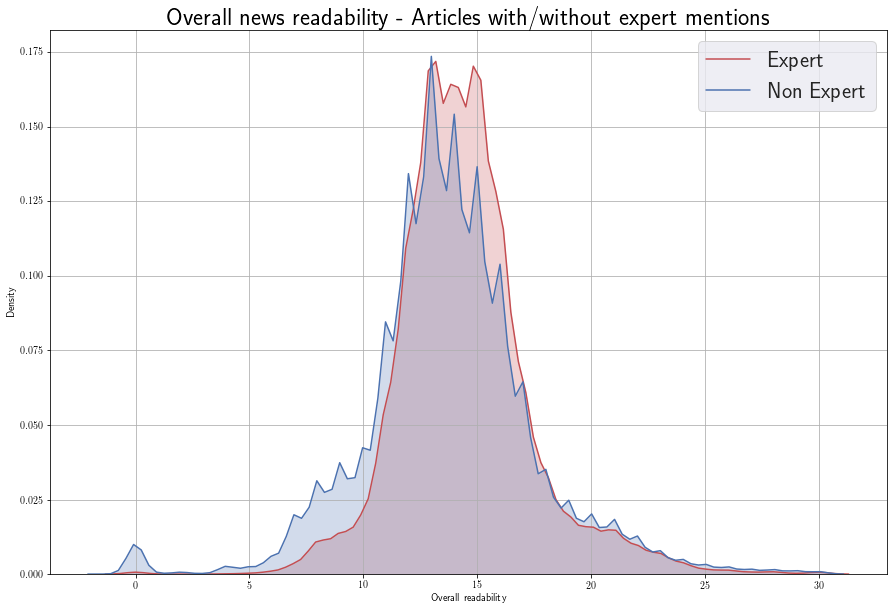

In [389]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns 

# Ensure type 1 fonts are used
mlp.rcParams['ps.useafm'] = True
mlp.rcParams['pdf.use14corefonts'] = True
mlp.rcParams['text.usetex'] = True

# Set font sizes for plots
legend_fontsize = 25
title_fontsize = 25
xlab_fontsize = 25
ylab_fontsize = 25
xtick_fontsize = 25
ytick_fontsize = 25

US_January_April_text_df_appended_date_clean_en_trunc = US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Overall_Readability_Float'] <= 30]

fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==1]['Overall_Readability_Float'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==0]['Overall_Readability_Float'], shade=True, color="b", label='Non Expert', )
ax.set_xlabel('Overall readability')
ax.set_ylabel('Density')
ax.set_title('Overall news readability - Articles with/without expert mentions')

overall_readability = 'Overall_Readability.png'
#plt.savefig(overall_readability, bbox_inches='tight', transparent=True, dpi=1000)
#plt.show()
ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.get_figure().savefig(overall_readability, bbox_inches='tight', transparent=False, dpi=1000)

#US_January_April_text_df_appended_date_clean_en['Expert_Mention_Label'] = US_January_April_text_df_appended_date_clean_en['Expert_Mention'].apply(str)
#sns.distplot(US_January_April_text_df_appended_date_clean_en['Overall_Readability_Float'], hist = False, kde = True,
#                 kde_kws = {'shade': True, 'linewidth': 3}, label='Expert_Mention_Label')

#sns.set()
#fig, ax = plt.subplots()
#ax.plot(x, y, marker='s', linestyle='none', label='small')
#ax.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
#ax.set_xlabel('X_axis',fontsize=20);
#ax.set_ylabel('Y_axis',fontsize=20);

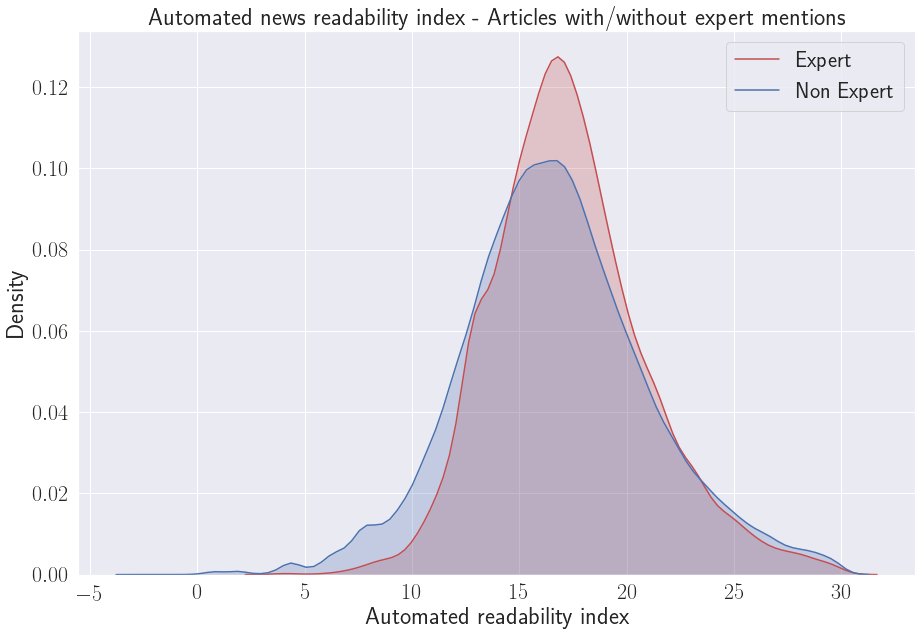

In [390]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

US_January_April_text_df_appended_date_clean_en_trunc = US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['automated_readability_index'] <= 30]

sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==1]['automated_readability_index'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==0]['automated_readability_index'], shade=True, color="b", label='Non Expert')
ax.set_xlabel('Automated readability index')
ax.set_ylabel('Density')
ax.set_title('Automated news readability index - Articles with/without expert mentions')


ax.xaxis.grid(True)
ax.yaxis.grid(True)



automated_readability = 'automated_redability.png'
#plt.savefig(automated_readability, bbox_inches='tight', transparent=True, dpi=1000
            
ax.get_figure().savefig(automated_readability, bbox_inches='tight', transparent=False, dpi=1000)
#plt.show()

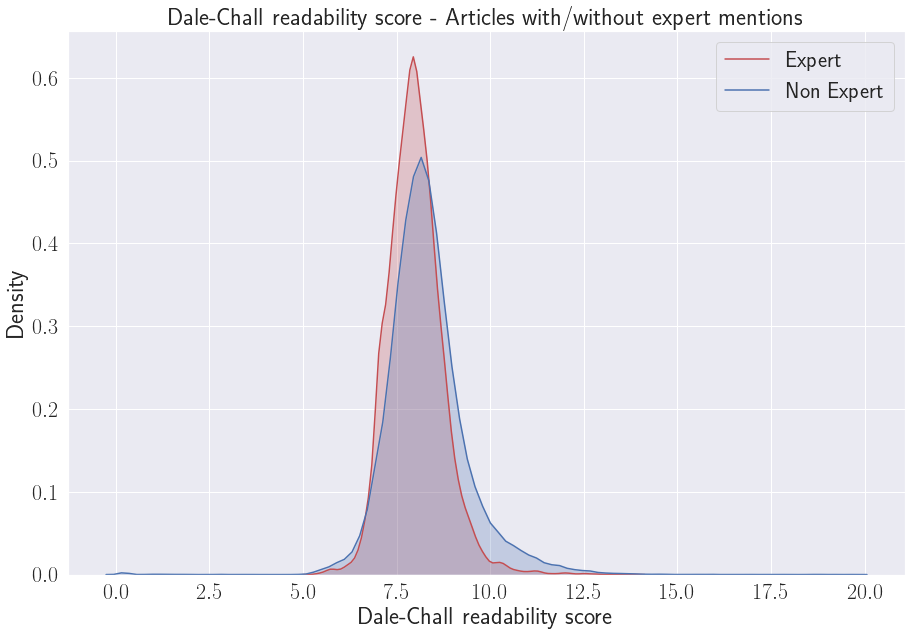

In [391]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

US_January_April_text_df_appended_date_clean_en_trunc = US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['dale_chall_readability_score'] <= 20]

sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==1]['dale_chall_readability_score'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==0]['dale_chall_readability_score'], shade=True, color="b", label='Non Expert')
ax.set_xlabel('Dale-Chall readability score')
ax.set_ylabel('Density')
ax.set_title('Dale-Chall readability score - Articles with/without expert mentions')

ax.xaxis.grid(True)
ax.yaxis.grid(True)

dale_chall_readability = 'Dale_Chall_Readability.png'
#plt.savefig(dale_chall_readability, bbox_inches='tight', transparent=True, dpi=1000)

ax.get_figure().savefig(dale_chall_readability, bbox_inches='tight', transparent=False, dpi=1000)

#plt.show()

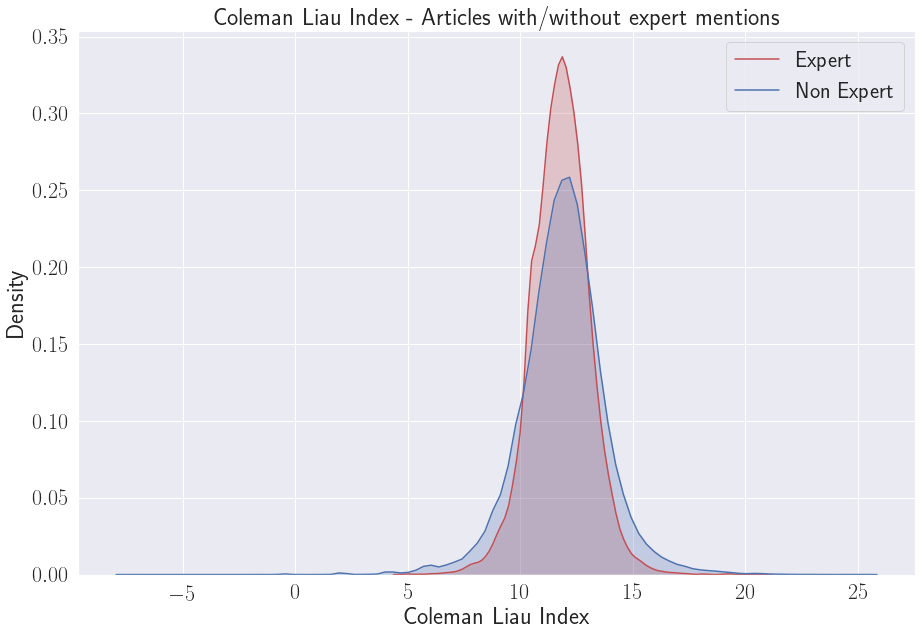

In [392]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

US_January_April_text_df_appended_date_clean_en_trunc = US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['coleman_liau_index'] <= 30]

sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==1]['coleman_liau_index'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==0]['coleman_liau_index'], shade=True, color="b", label='Non Expert')
ax.set_xlabel('Coleman Liau Index')
ax.set_ylabel('Density')
ax.set_title('Coleman Liau Index - Articles with/without expert mentions')


ax.xaxis.grid(True)
ax.yaxis.grid(True)

coleman_liau_index = 'coleman_liau_index.png'
#plt.savefig(automated_readability, bbox_inches='tight', transparent=True, dpi=1000
            
ax.get_figure().savefig(coleman_liau_index, bbox_inches='tight', transparent=False, dpi=1000)
#plt.show()

In [ ]:
['flesch_kincaid_grade']

In [ ]:
['flesch_reading_ease']

In [ ]:
gunning_fog

In [ ]:
smog_index

In [ ]:
linsear_write_formula

In [ ]:
#US_January_April_text_df_appended_date_clean_en['Expert_Mention_Label'].value_counts()

In [ ]:
#US_January_April_text_df_appended_date_clean_en['Expert_Mention'].value_counts()/US_January_April_text_df_appended_date_clean_en.shape[0]

In [ ]:
#US_January_April_text_df_appended_date_clean_expert_en['Expert_Mention_Sentence_List'].head()

In [ ]:
### Mentions over time

In [ ]:
num_articles_by_date = US_January_April_text_df_appended_date_clean_en.groupby('date_clean_2')['date_clean_2'].value_counts()

In [ ]:
num_articles_by_date

In [ ]:
expert_mention_by_date = US_January_April_text_df_appended_date_clean_expert_en.groupby('date_clean_2')['Expert_Mention'].value_counts()

In [ ]:
expert_mention_by_date

In [ ]:
overall_sentiment_by_media = US_January_April_text_df_appended_date_clean_en.groupby('media_name')['avg_polarity_score_compound'].mean()

In [ ]:
overall_sentiment_by_media

In [ ]:
overall_readability_by_media = US_January_April_text_df_appended_date_clean_en.groupby('media_name')['Overall_Readability_Float'].mean()

In [ ]:
overall_readability_by_media

### Basic stats (num sentences, num words) - All, expert vs. non expert

In [411]:
US_January_April_text_df_appended_date_clean_en['num_word'].describe()

count    123764.000000
mean        680.628680
std         872.937251
min           1.000000
25%         239.000000
50%         505.000000
75%         845.000000
max       25738.000000
Name: num_word, dtype: float64

In [412]:
US_January_April_text_df_appended_date_clean_expert_en['num_word'].describe()

count    11392.000000
mean      1306.462518
std       1407.833698
min         20.000000
25%        567.000000
50%        922.500000
75%       1533.000000
max      20534.000000
Name: num_word, dtype: float64

In [413]:
US_January_April_text_df_appended_date_clean_non_expert_en['num_word'].describe()

count    112372.000000
mean        617.183168
std         771.119760
min           1.000000
25%         214.000000
50%         476.000000
75%         797.000000
max       25738.000000
Name: num_word, dtype: float64

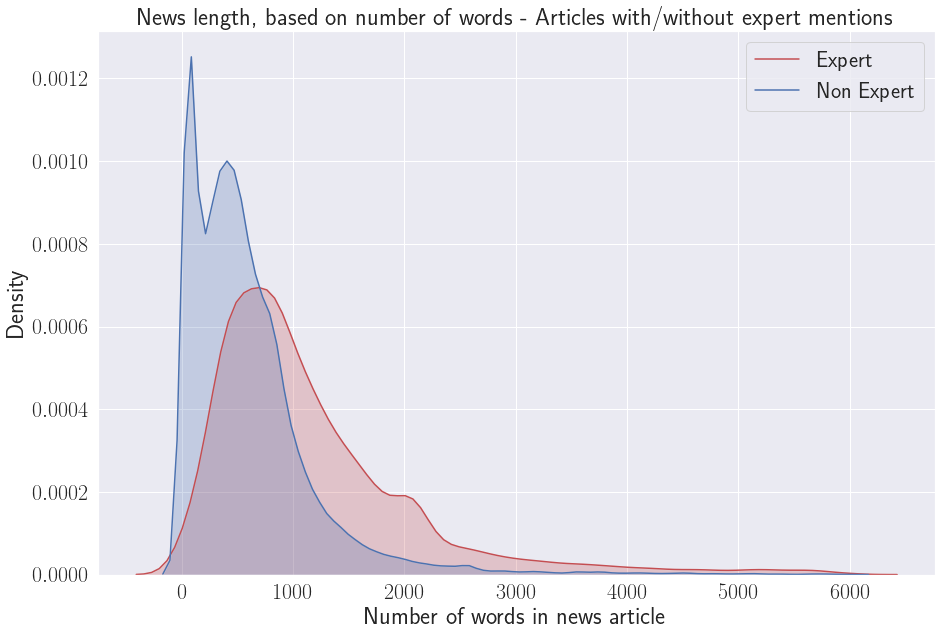

In [430]:
US_January_April_text_df_appended_date_clean_en_trunc = US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['num_word'] <= 6000]

fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==1]['num_word'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==0]['num_word'], shade=True, color="b", label='Non Expert')
ax.set_xlabel('Number of words in news article')
ax.set_ylabel('Density')
ax.set_title('News length, based on number of words - Articles with/without expert mentions')

ax.xaxis.grid(True)
ax.yaxis.grid(True)

news_length_words = 'News_Length_Number_Words.png'
#plt.savefig(news_length_words, bbox_inches='tight', transparent=True, dpi=1000)

ax.get_figure().savefig(news_length_words, bbox_inches='tight', transparent=False, dpi=1000)

#plt.show()

In [431]:
US_January_April_text_df_appended_date_clean_en['num_sen'].describe()

count    123764.000000
mean         25.368023
std          33.684845
min           1.000000
25%           9.000000
50%          18.000000
75%          31.000000
max        1316.000000
Name: num_sen, dtype: float64

In [432]:
US_January_April_text_df_appended_date_clean_expert_en['num_sen'].describe()

count    11392.000000
mean        47.907303
std         54.255486
min          1.000000
25%         20.000000
50%         33.000000
75%         56.000000
max        664.000000
Name: num_sen, dtype: float64

In [433]:
US_January_April_text_df_appended_date_clean_non_expert_en['num_sen'].describe()

count    112372.000000
mean         23.083046
std          29.909515
min           1.000000
25%           8.000000
50%          17.000000
75%          29.000000
max        1316.000000
Name: num_sen, dtype: float64

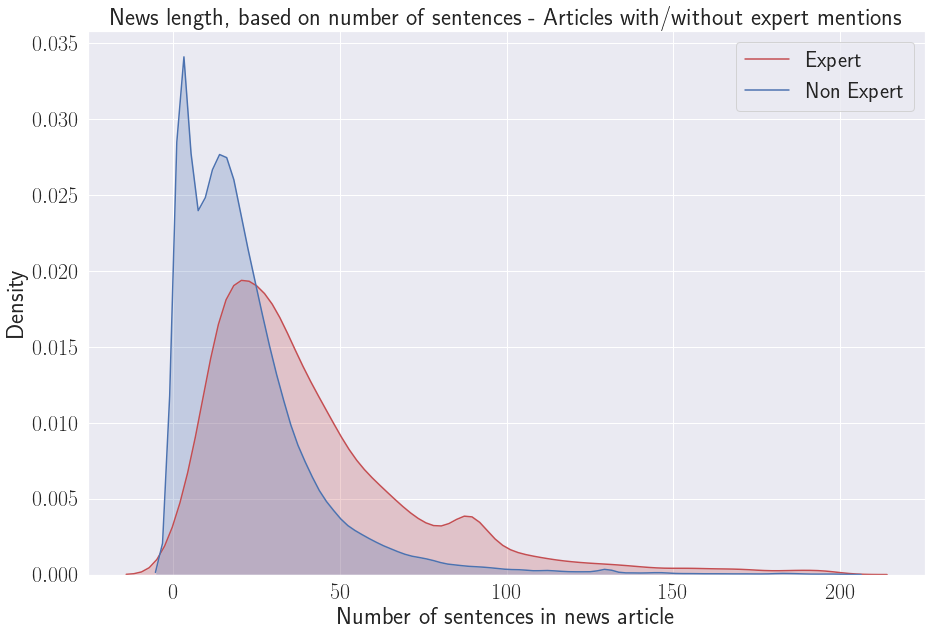

In [434]:
US_January_April_text_df_appended_date_clean_en_trunc = US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['num_sen'] <= 200]

fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==1]['num_sen'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en_trunc[US_January_April_text_df_appended_date_clean_en_trunc['Expert_Mention']==0]['num_sen'], shade=True, color="b", label='Non Expert')
ax.set_xlabel('Number of sentences in news article')
ax.set_ylabel('Density')
ax.set_title('News length, based on number of sentences - Articles with/without expert mentions')

ax.xaxis.grid(True)
ax.yaxis.grid(True)

news_length_sent = 'News_Length_Number_Sentences.png'

ax.get_figure().savefig(news_length_sent, bbox_inches='tight', transparent=False, dpi=1000)


#plt.savefig(news_length_sent, bbox_inches='tight', transparent=True, dpi=1000)
#plt.show()

### Histograms - All, expert vs. non expert

In [435]:
### Polarity score by date - All, expert vs. non expert

In [436]:
### 1. Compound

In [437]:
US_January_April_text_df_appended_date_clean_en['avg_polarity_score_compound'].describe()

count    123764.000000
mean         -0.003420
std           0.193774
min          -0.980500
25%          -0.105385
50%           0.000000
75%           0.102418
max           0.992200
Name: avg_polarity_score_compound, dtype: float64

In [438]:
US_January_April_text_df_appended_date_clean_expert_en['avg_polarity_score_compound'].describe()

count    11392.000000
mean        -0.021825
std          0.136583
min         -0.875000
25%         -0.102157
50%         -0.021481
75%          0.057265
max          0.817600
Name: avg_polarity_score_compound, dtype: float64

In [439]:
US_January_April_text_df_appended_date_clean_non_expert_en['avg_polarity_score_compound'].describe()

count    112372.000000
mean         -0.001554
std           0.198560
min          -0.980500
25%          -0.105969
50%           0.000000
75%           0.107895
max           0.992200
Name: avg_polarity_score_compound, dtype: float64

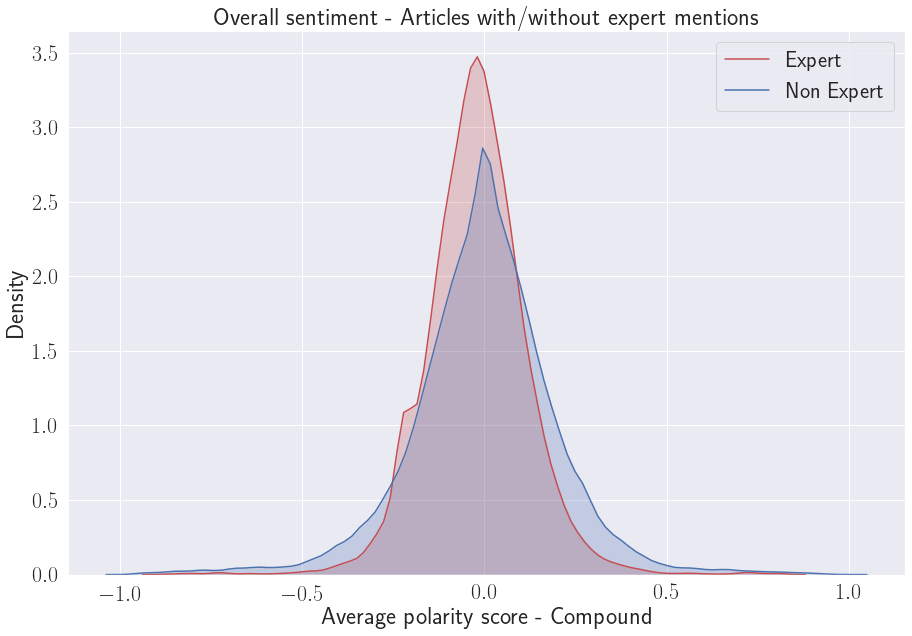

In [440]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

sns.kdeplot(US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention']==1]['avg_polarity_score_compound'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention']==0]['avg_polarity_score_compound'], shade=True, color="b", label='Non Expert')
ax.set_xlabel('Average polarity score - Compound')
ax.set_ylabel('Density')
ax.set_title('Overall sentiment - Articles with/without expert mentions')

ax.xaxis.grid(True)
ax.yaxis.grid(True)


overall_sentiment = 'Overall_Sentiment.png'

ax.get_figure().savefig(overall_sentiment, bbox_inches='tight', transparent=False, dpi=1000)


#plt.savefig(overall_sentiment, bbox_inches='tight', transparent=True, dpi=1000)
#plt.show()

### Positive polarity score

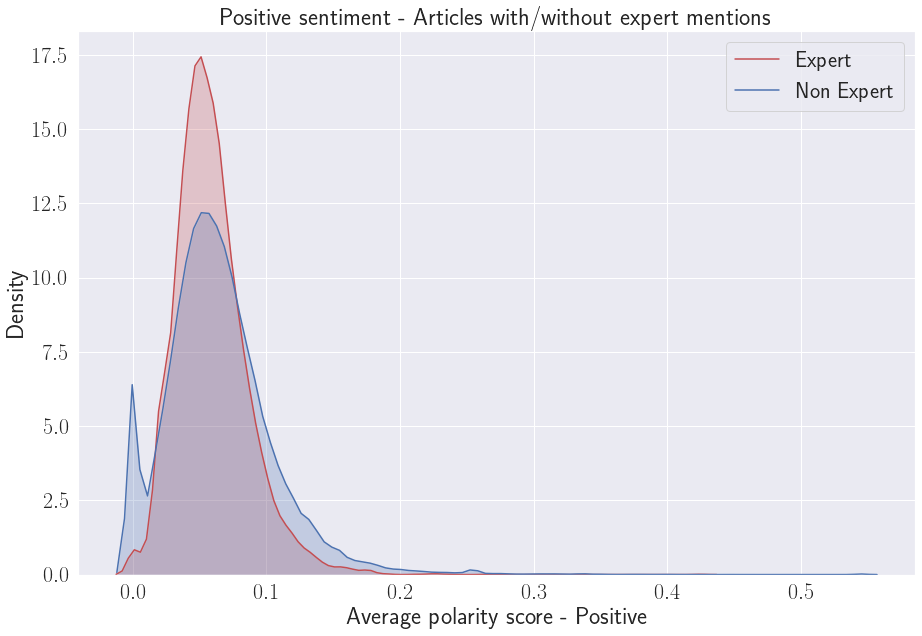

In [441]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

sns.kdeplot(US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention']==1]['avg_polarity_score_positive'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention']==0]['avg_polarity_score_positive'], shade=True, color="b", label='Non Expert')
ax.set_xlabel('Average polarity score - Positive')
ax.set_ylabel('Density')
ax.set_title('Positive sentiment - Articles with/without expert mentions')

ax.xaxis.grid(True)
ax.yaxis.grid(True)


positive_sentiment = 'Positive_Sentiment.png'
ax.get_figure().savefig(positive_sentiment, bbox_inches='tight', transparent=False, dpi=1000)

#plt.savefig(positive_sentiment, bbox_inches='tight', transparent=True, dpi=1000)
#plt.show()

### Average polarity score - Negative

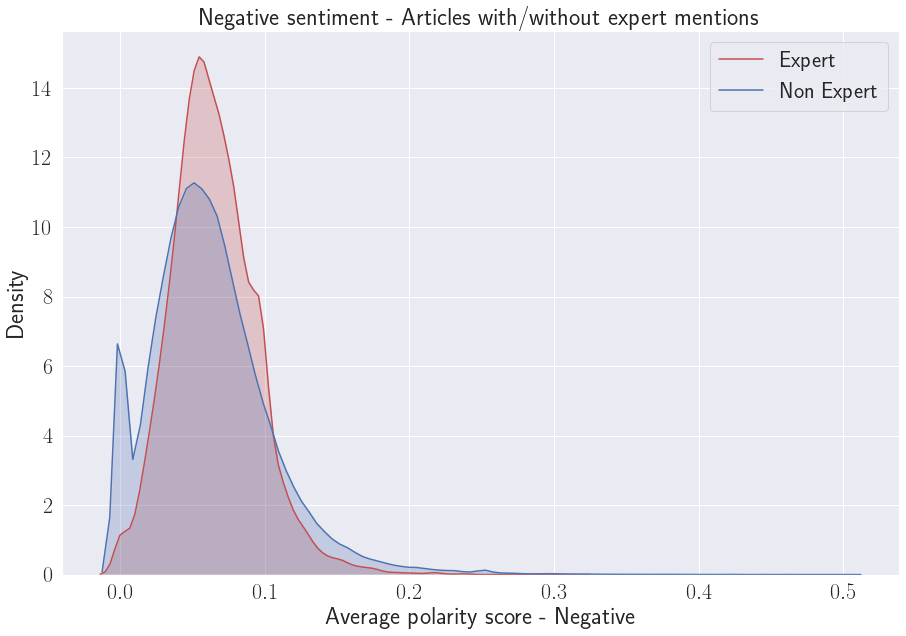

In [442]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

sns.kdeplot(US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention']==1]['avg_polarity_score_negative'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention']==0]['avg_polarity_score_negative'], shade=True, color="b", label='Non Expert')
ax.set_xlabel('Average polarity score - Negative')
ax.set_ylabel('Density')
ax.set_title('Negative sentiment - Articles with/without expert mentions')

ax.xaxis.grid(True)
ax.yaxis.grid(True)


negative_sentiment = 'Negative_Sentiment.png'

ax.get_figure().savefig(negative_sentiment, bbox_inches='tight', transparent=False, dpi=1000)

#plt.savefig(negative_sentiment, bbox_inches='tight', transparent=True, dpi=1000)
#plt.show()

### Average polarity score - Neutral

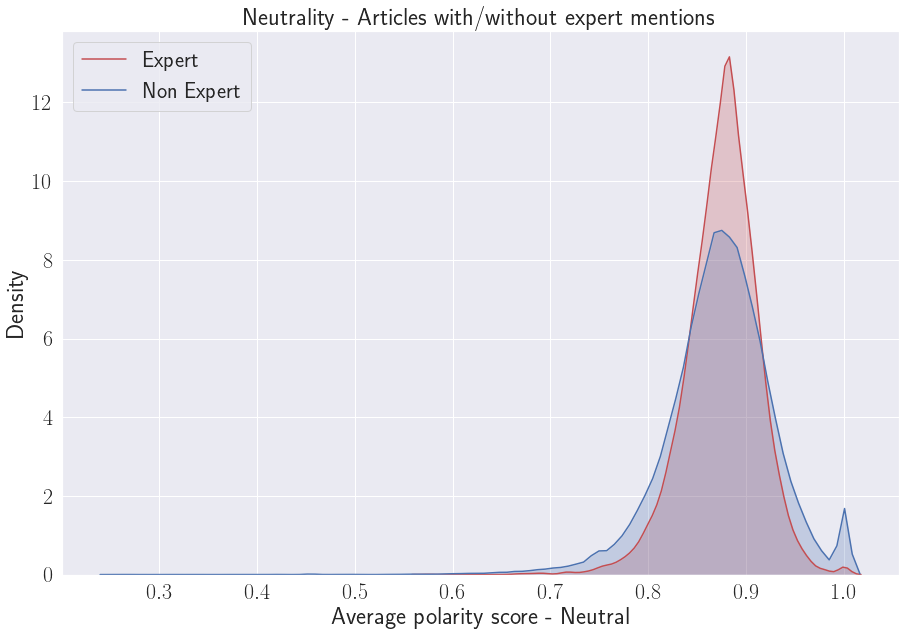

In [443]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=2)

sns.kdeplot(US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention']==1]['avg_polarity_score_neutral'], shade=True, color="r", label='Expert')
sns.kdeplot(US_January_April_text_df_appended_date_clean_en[US_January_April_text_df_appended_date_clean_en['Expert_Mention']==0]['avg_polarity_score_neutral'], shade=True, color="b", label='Non Expert')
ax.set_xlabel('Average polarity score - Neutral')
ax.set_ylabel('Density')
ax.set_title('Neutrality - Articles with/without expert mentions')

ax.xaxis.grid(True)
ax.yaxis.grid(True)


neutral_sentiment = 'Neutrality.png'

ax.get_figure().savefig(neutral_sentiment, bbox_inches='tight', transparent=False, dpi=1000)

#plt.savefig(neutral_sentiment, bbox_inches='tight', transparent=True, dpi=1000)
#plt.show()

In [449]:
avg_polarity_score_compound_by_date = US_January_April_text_df_appended_date_clean_en.groupby('date_clean_2')['avg_polarity_score_compound'].mean().rename_axis('date').reset_index(name='avg_polarity_score_compound')

In [450]:
avg_polarity_score_compound_by_date 

,date,avg_polarity_score_compound
0,2020-01-03,-0.260932
1,2020-01-06,-0.145798
2,2020-01-07,0.063599
3,2020-01-08,-0.123573
4,2020-01-09,-0.169767
5,2020-01-10,-0.191984
6,2020-01-11,-0.317109
7,2020-01-12,-0.145293
8,2020-01-13,-0.100027
9,2020-01-14,-0.159688


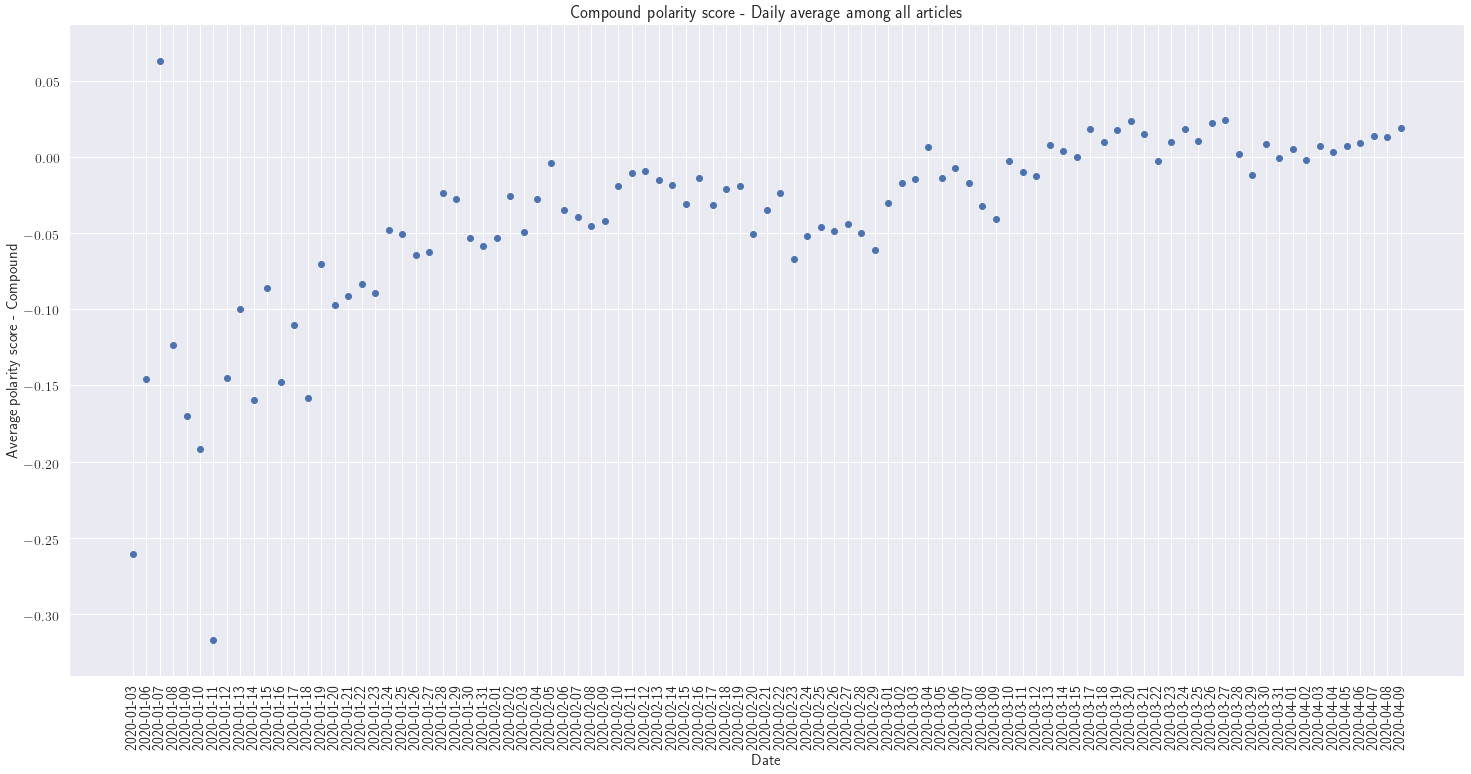

In [451]:
fig, ax = plt.subplots(figsize=(25,12))

x_ticks_labels = avg_polarity_score_compound_by_date['date']

plt.scatter(avg_polarity_score_compound_by_date['date'],avg_polarity_score_compound_by_date['avg_polarity_score_compound'])
plt.xticks(rotation=90)
ax.set_xticklabels(x_ticks_labels)
plt.xlabel('Date',fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Average polarity score - Compound',fontsize=15)
plt.yticks(fontsize=14)
plt.title('Compound polarity score - Daily average among all articles',fontsize=17)
plt.show()

### Expert

In [452]:
avg_polarity_score_compound_by_date_expert = US_January_April_text_df_appended_date_clean_expert_en.groupby('date_clean_2')['avg_polarity_score_compound'].mean().rename_axis('date').reset_index(name='avg_polarity_score_compound')

In [453]:
avg_polarity_score_compound_by_date_expert

,date,avg_polarity_score_compound
0,2020-01-03,-0.295957
1,2020-01-06,-0.145798
2,2020-01-08,-0.127814
3,2020-01-09,-0.057690
4,2020-01-14,-0.047496
5,2020-01-15,-0.063759
6,2020-01-16,-0.077720
7,2020-01-17,-0.065897
8,2020-01-18,-0.015652
9,2020-01-19,-0.066468


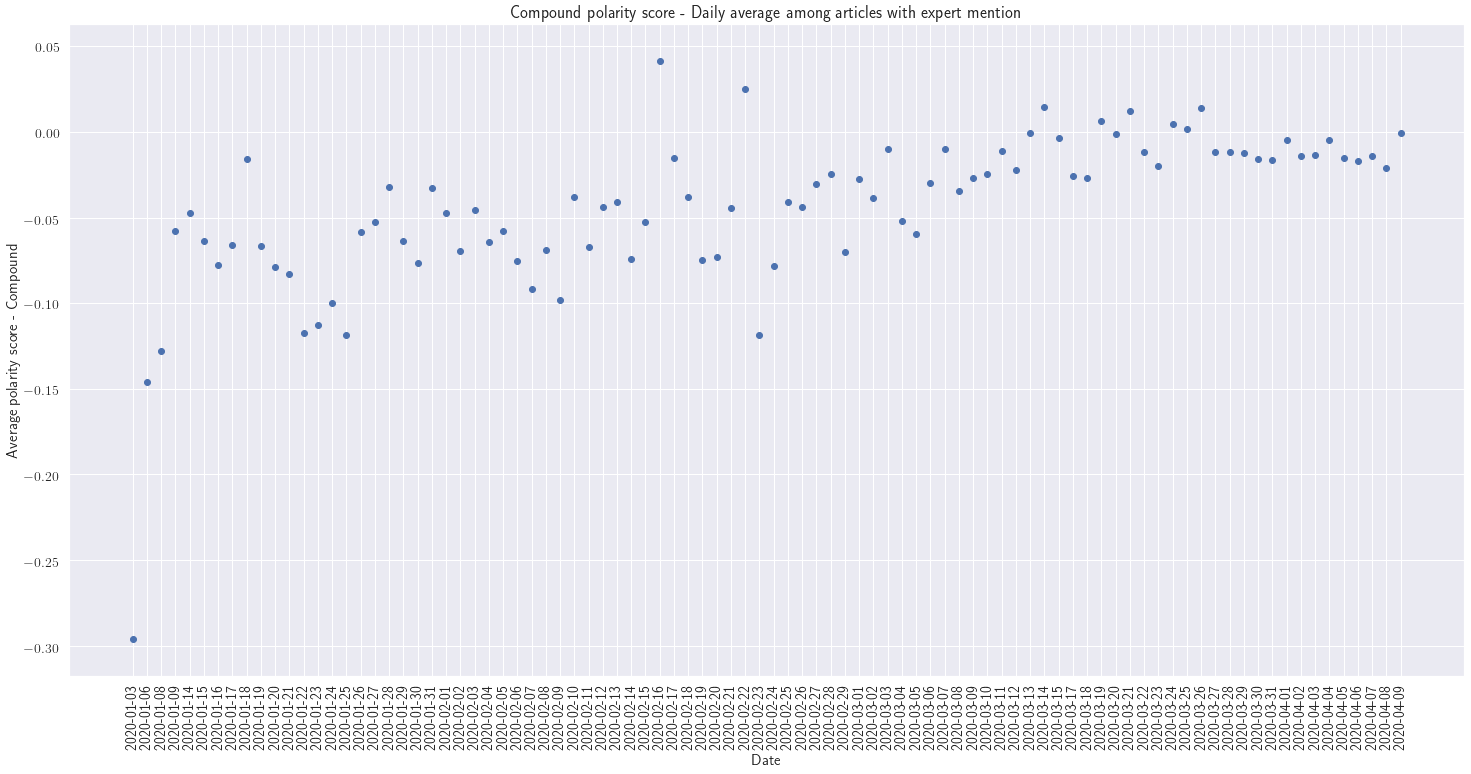

In [454]:
fig, ax = plt.subplots(figsize=(25,12))

x_ticks_labels = avg_polarity_score_compound_by_date_expert['date']

plt.scatter(avg_polarity_score_compound_by_date_expert['date'],avg_polarity_score_compound_by_date_expert['avg_polarity_score_compound'])
plt.xticks(rotation=90)
ax.set_xticklabels(x_ticks_labels)
plt.xlabel('Date',fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Average polarity score - Compound',fontsize=15)
plt.yticks(fontsize=14)
plt.title('Compound polarity score - Daily average among articles with expert mention',fontsize=17)
plt.show()

### Non expert

In [455]:
avg_polarity_score_compound_by_date_non_expert = US_January_April_text_df_appended_date_clean_non_expert_en.groupby('date_clean_2')['avg_polarity_score_compound'].mean().rename_axis('date').reset_index(name='avg_polarity_score_compound')

In [456]:
avg_polarity_score_compound_by_date_non_expert

,date,avg_polarity_score_compound
0,2020-01-03,-0.243420
1,2020-01-07,0.063599
2,2020-01-08,-0.121452
3,2020-01-09,-0.190145
4,2020-01-10,-0.191984
5,2020-01-11,-0.317109
6,2020-01-12,-0.145293
7,2020-01-13,-0.100027
8,2020-01-14,-0.182126
9,2020-01-15,-0.090712


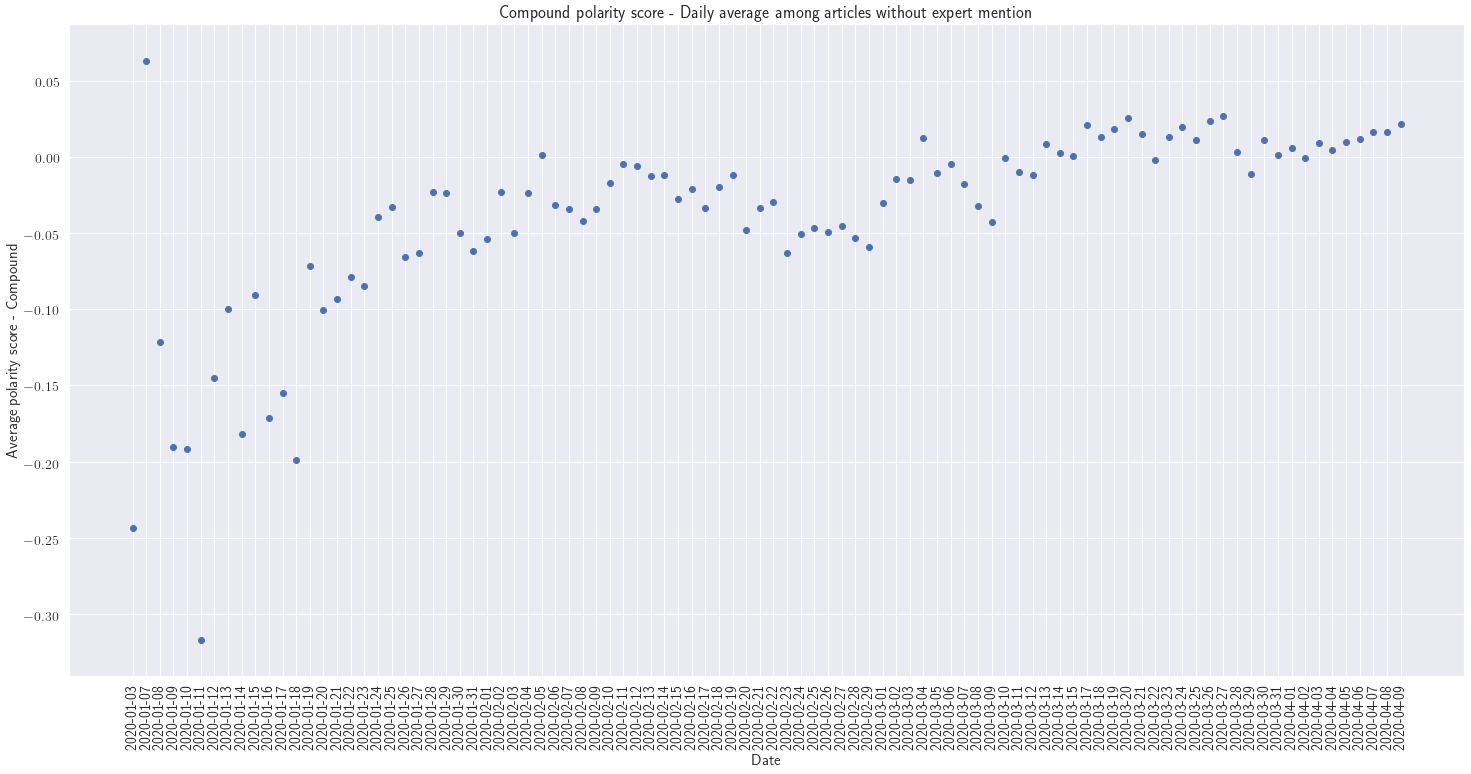

In [457]:
fig, ax = plt.subplots(figsize=(25,12))

x_ticks_labels = avg_polarity_score_compound_by_date_non_expert['date']

plt.scatter(avg_polarity_score_compound_by_date_non_expert['date'],avg_polarity_score_compound_by_date_non_expert['avg_polarity_score_compound'])
plt.xticks(rotation=90)
ax.set_xticklabels(x_ticks_labels)
plt.xlabel('Date',fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Average polarity score - Compound',fontsize=15)
plt.yticks(fontsize=14)
plt.title('Compound polarity score - Daily average among articles without expert mention',fontsize=17)
plt.show()

In [458]:
# By week?
US_January_April_text_df_appended_date_clean_en['date_clean_2'][0]

'2020-01-31'

In [459]:
# By month?

In [460]:
US_January_April_text_df_appended_date_clean_en['date_datetime'] = pd.to_datetime(US_January_April_text_df_appended_date_clean_en['date_clean_2'], format='%Y-%m-%d')

In [ ]:
US_January_April_text_df_appended_date_clean_en['date_datetime'] = pd.to_datetime(US_January_April_text_df_appended_date_clean_en['date_clean_2'], format='%Y-%m-%d')

In [461]:
US_January_April_text_df_appended_date_clean_en['week'] = [US_January_April_text_df_appended_date_clean_en.loc[i,'date_datetime'].isocalendar()[1] for i in range(US_January_April_text_df_appended_date_clean_en.shape[0])]

In [103]:
# Expert
# US_January_April_text_df_appended_date_clean_expert_en['week'] = [US_January_April_text_df_appended_date_clean_expert_en.loc[i,'date_datetime'].isocalendar()[1] for i in range(US_January_April_text_df_appended_date_clean_expert_en.shape[0])]
# Non-expert
# US_January_April_text_df_appended_date_clean_non_expert_en['week'] = [US_January_April_text_df_appended_date_clean_non_expert_en.loc[i,'date_datetime'].isocalendar()[1] for i in range(US_January_April_text_df_appended_date_clean_non_expert_en.shape[0])]

In [463]:
US_January_April_text_df_appended_date_clean_en['month'] = [US_January_April_text_df_appended_date_clean_en.loc[i,'date_datetime'].month for i in range(US_January_April_text_df_appended_date_clean_en.shape[0])]

In [464]:
# Expert 

# Non-expert

In [465]:
avg_polarity_score_compound_by_week = US_January_April_text_df_appended_date_clean_en.groupby('week')['avg_polarity_score_compound'].mean().rename_axis('week').reset_index(name='avg_polarity_score_compound')

In [ ]:
# Expert
avg_polarity_score_compound_by_week = US_January_April_text_df_appended_date_clean_en.groupby('week')['avg_polarity_score_compound'].mean().rename_axis('week').reset_index(name='avg_polarity_score_compound')
# Non-expert


In [466]:
avg_polarity_score_compound_by_month = US_January_April_text_df_appended_date_clean_en.groupby('month')['avg_polarity_score_compound'].mean().rename_axis('month').reset_index(name='avg_polarity_score_compound')

In [467]:
avg_polarity_score_compound_by_week.tail() 

,week,avg_polarity_score_compound
10,11,-0.008698
11,12,0.015300
12,13,0.013804
13,14,0.004021
14,15,0.013900


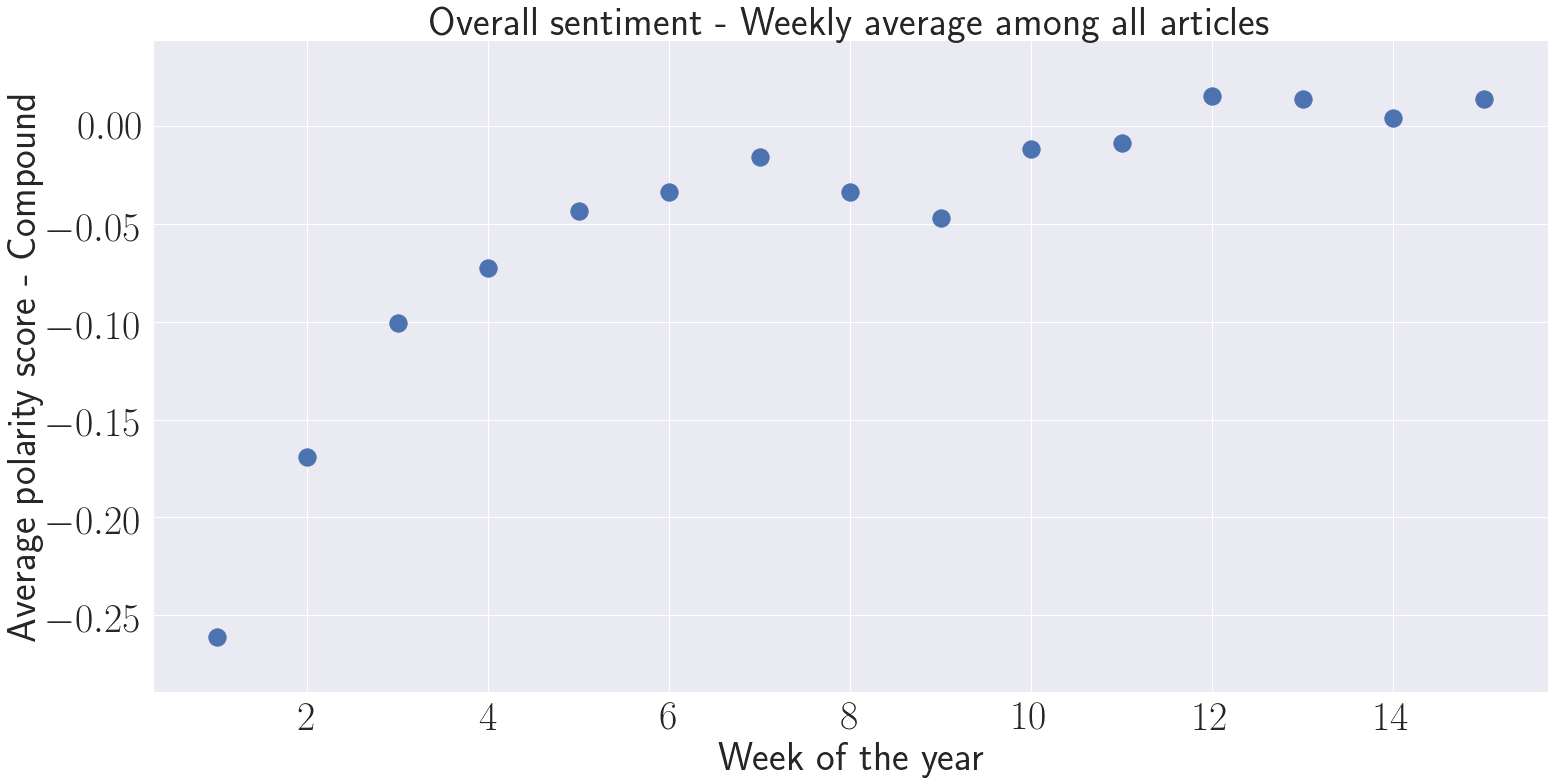

In [468]:
fig, ax = plt.subplots(figsize=(25,12))

x_ticks_labels = avg_polarity_score_compound_by_week['week']
#print(x_ticks_labels)

plt.scatter(avg_polarity_score_compound_by_week['week'],avg_polarity_score_compound_by_week['avg_polarity_score_compound'], s=300)
#ax.set_xticklabels(x_ticks_labels)
plt.xlabel('Week of the year',fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('Average polarity score - Compound',fontsize=40)
plt.yticks(fontsize=40)
plt.title('Overall sentiment - Weekly average among all articles',fontsize=40)

ax.xaxis.grid(True)
ax.yaxis.grid(True)


compound_week_avg = 'compound_week_avg.png'

ax.get_figure().savefig(compound_week_avg, bbox_inches='tight', transparent=False, dpi=1000)

#plt.savefig(compound_week_avg, bbox_inches='tight', transparent=True, dpi=1000)

#plt.show()

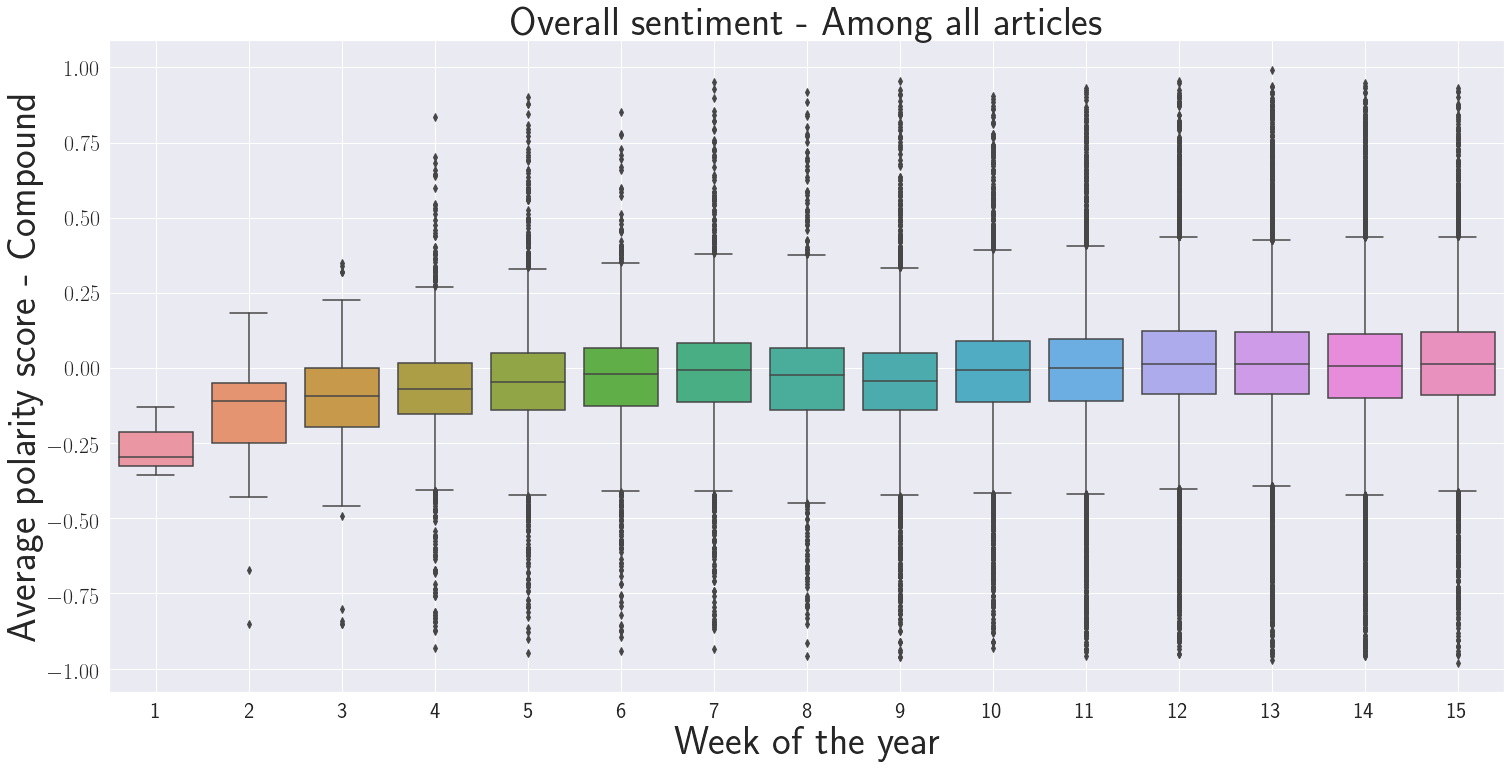

In [469]:
import seaborn as sns
plt.figure(figsize=(25,12))

x_ticks_labels = avg_polarity_score_compound_by_week['week']

xarr = np.array(US_January_April_text_df_appended_date_clean_en['week'])
y=US_January_April_text_df_appended_date_clean_en['avg_polarity_score_compound']
ind = np.where(xarr.reshape(xarr.size, 1) == np.array(x_ticks_labels))[1]

ax=sns.boxplot(ind,y)
ax.set_xticks(range(len(x_ticks_labels)))
ax.set_xticklabels(x_ticks_labels)

#plt.xticks(rotation=90)
plt.xlabel('Week of the year',fontsize=40)
plt.ylabel('Average polarity score - Compound',fontsize=40)
plt.title('Overall sentiment - Among all articles',fontsize=40)

ax.xaxis.grid(True)
ax.yaxis.grid(True)


compound_week = 'compound_week.png'

ax.get_figure().savefig(compound_week, bbox_inches='tight', transparent=False, dpi=1000)


#plt.savefig(compound_week, bbox_inches='tight', transparent=True, dpi=1000)

#plt.show()

[1, 2, 3, 4]


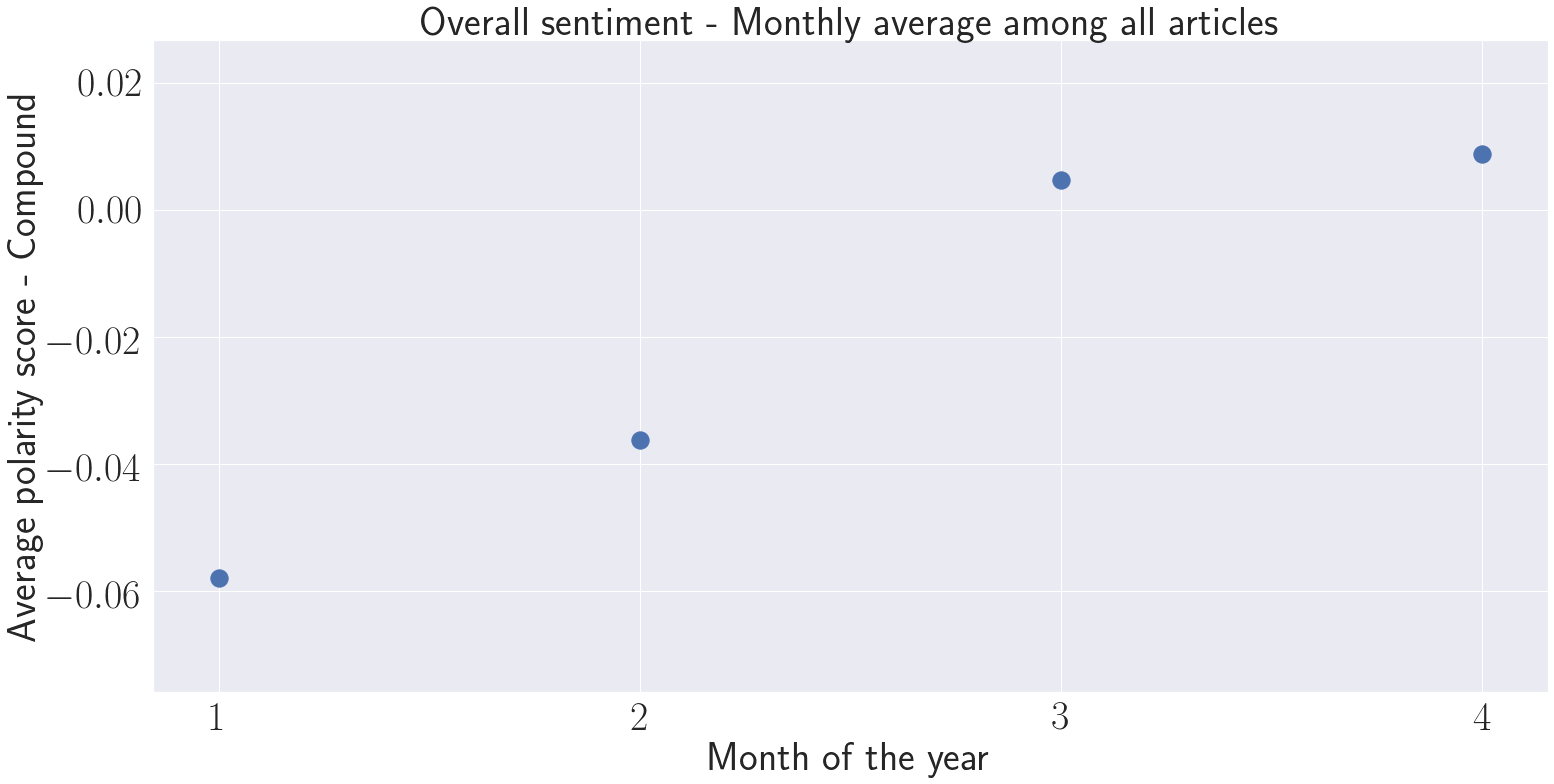

In [470]:
fig, ax = plt.subplots(figsize=(25,12))

x_ticks_labels = [int(avg_polarity_score_compound_by_month.loc[i,'month']) for i in range(avg_polarity_score_compound_by_month.shape[0])]
print(x_ticks_labels)

plt.scatter(avg_polarity_score_compound_by_month['month'],avg_polarity_score_compound_by_month['avg_polarity_score_compound'], s=300)

plt.xticks(x_ticks_labels)
#ax.set_xticklabels(x_ticks_labels)
plt.xlabel('Month of the year',fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('Average polarity score - Compound',fontsize=40)
plt.yticks(fontsize=40)
plt.title('Overall sentiment - Monthly average among all articles',fontsize=40)

ax.xaxis.grid(True)
ax.yaxis.grid(True)


compound_month_avg = 'compound_month_avg.png'

ax.get_figure().savefig(compound_month_avg, bbox_inches='tight', transparent=False, dpi=1000)


#plt.savefig(compound_month_avg, bbox_inches='tight', transparent=True, dpi=1000)

#plt.show()

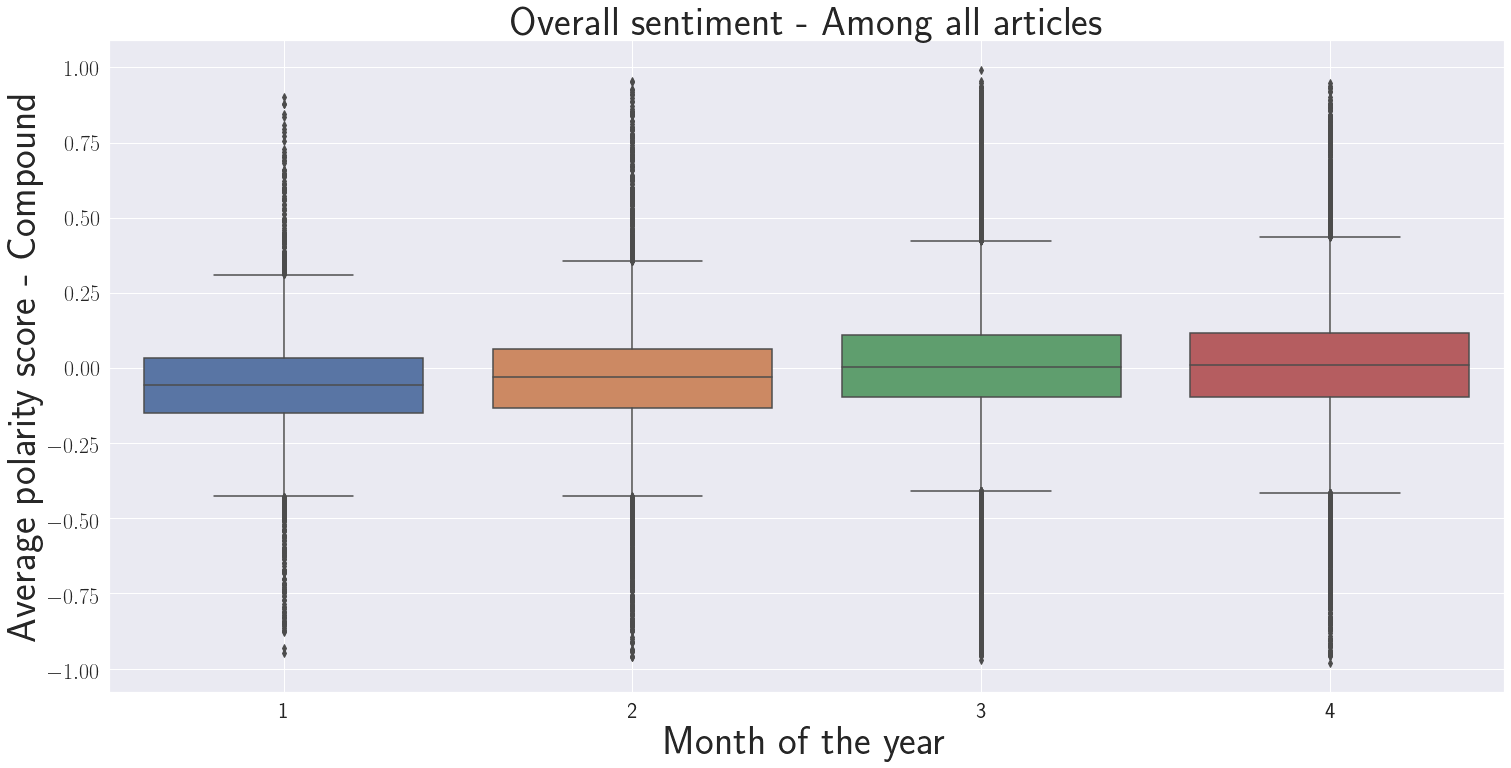

In [471]:
import seaborn as sns
plt.figure(figsize=(25,12))

x_ticks_labels = avg_polarity_score_compound_by_month['month']

xarr = np.array(US_January_April_text_df_appended_date_clean_en['month'])
y=US_January_April_text_df_appended_date_clean_en['avg_polarity_score_compound']
ind = np.where(xarr.reshape(xarr.size, 1) == np.array(x_ticks_labels))[1]

ax=sns.boxplot(ind,y)
ax.set_xticks(range(len(x_ticks_labels)))
ax.set_xticklabels(x_ticks_labels)

#plt.xticks(rotation=90)
plt.xlabel('Month of the year',fontsize=40)
plt.ylabel('Average polarity score - Compound',fontsize=40)
plt.title('Overall sentiment - Among all articles',fontsize=40)

ax.xaxis.grid(True)
ax.yaxis.grid(True)


compound_month = 'compound_month.png'

ax.get_figure().savefig(compound_month, bbox_inches='tight', transparent=False, dpi=1000)


#plt.savefig(compound_month, bbox_inches='tight', transparent=True, dpi=1000)

#plt.show()

In [ ]:
### 2. Negative

In [ ]:
### 3. Positive

In [ ]:
### 4. Neutral

In [ ]:
# Average polarity score - All, expert vs. non expert

In [ ]:
avg_polarity_score_compound_by_date_expert

In [ ]:
expert_avg_polarity_score_compound_by_date

In [ ]:
US_January_April_text_df_appended_date_clean_en.shape

In [ ]:
US_January_April_text_df_appended_date_clean_en.to_csv('US_January_April_text_df_appended_date_clean_en.csv',index=False,encoding='utf-8')

### 05/25/2020 - Political Leaning Work

In [257]:
political_leaning_result_1_df = pd.read_csv('political_leaning_result_1.csv')

In [258]:
political_leaning_result_1_df.shape

(45539, 12)

In [259]:
political_leaning_result_2_df = pd.read_csv('political_leaning_result_2.csv')

In [260]:
political_leaning_result_2_df.shape

(50068, 12)

In [255]:
political_leaning_result_3_df = pd.read_csv('political_leaning_result_3.csv')

In [256]:
political_leaning_result_3_df.shape

(26202, 12)

In [239]:
political_leaning_result_4_df = pd.read_csv('political_leaning_result_4.csv')

In [240]:
political_leaning_result_4_df.shape

(47026, 12)

In [193]:
political_leaning_result_5_df = pd.read_csv('political_leaning_result_5.csv')

In [194]:
political_leaning_result_5_df.shape

(15498, 12)

In [2]:
political_leaning_result_6_df = pd.read_csv('political_leaning_result_6.csv')

In [209]:
political_leaning_result_7_df = pd.read_csv('political_leaning_result_7.csv')

In [210]:
political_leaning_result_8_df = pd.read_csv('political_leaning_result_8.csv')

In [211]:
political_leaning_result_8_df.shape

(36571, 12)

In [212]:
political_leaning_result_9_df = pd.read_csv("political_leaning_result_9.csv")

In [176]:
political_leaning_result_10_df = pd.read_csv('political_leaning_result_10.csv')

In [178]:
political_leaning_result_10_df.shape

(18759, 12)

In [224]:
political_leaning_result_11_df = pd.read_csv('political_leaning_result_11.csv')

In [225]:
political_leaning_result_11_df.shape

(8495, 12)

In [325]:
political_leaning_result_12_df = pd.read_csv('political_leaning_result_12.csv')

In [326]:
political_leaning_result_12_df.shape

(11373, 12)

In [393]:
coronavirus_jan_april = pd.read_csv("Coronavirus_20200101_20200409_clean.csv")

### Filtering out the urls that were not downloadable

In [263]:
political_leaning_result_1_df = political_leaning_result_1_df[political_leaning_result_1_df['not_available'] == 0].reset_index()

In [264]:
political_leaning_result_1_df.shape[0]

33072

In [265]:
political_leaning_result_2_df = political_leaning_result_2_df[political_leaning_result_2_df['not_available'] == 0].reset_index()

In [266]:
political_leaning_result_2_df.shape[0]

49438

In [267]:
political_leaning_result_3_df = political_leaning_result_3_df[political_leaning_result_3_df['not_available'] == 0].reset_index()

In [268]:
political_leaning_result_3_df.shape[0]

12668

In [241]:
political_leaning_result_4_df = political_leaning_result_4_df[political_leaning_result_4_df['not_available'] == 0].reset_index()

In [242]:
political_leaning_result_4_df.shape[0]

26396

In [195]:
political_leaning_result_5_df = political_leaning_result_5_df[political_leaning_result_5_df['not_available'] == 0].reset_index()

In [196]:
political_leaning_result_5_df.shape[0]

14815

In [213]:
political_leaning_result_6_df = political_leaning_result_6_df[political_leaning_result_6_df['not_available'] == 0].reset_index()

In [214]:
political_leaning_result_6_df.shape[0]

19252

In [215]:
political_leaning_result_7_df = political_leaning_result_7_df[political_leaning_result_7_df['not_available'] == 0].reset_index()

In [216]:
political_leaning_result_7_df.shape[0]

16965

In [217]:
political_leaning_result_8_df = political_leaning_result_8_df[political_leaning_result_8_df['not_available'] == 0].reset_index()

In [218]:
political_leaning_result_8_df.shape[0]

36555

In [219]:
political_leaning_result_9_df = political_leaning_result_9_df[political_leaning_result_9_df['not_available'] == 0].reset_index()

In [220]:
political_leaning_result_9_df.shape[0]

12571

In [179]:
political_leaning_result_10_df = political_leaning_result_10_df[political_leaning_result_10_df['not_available'] == 0].reset_index()

In [181]:
political_leaning_result_10_df.shape

(18542, 13)

In [226]:
political_leaning_result_11_df = political_leaning_result_11_df[political_leaning_result_11_df['not_available'] == 0].reset_index()

In [327]:
political_leaning_result_12_df = political_leaning_result_12_df[political_leaning_result_12_df['not_available'] == 0].reset_index()

In [394]:
coronavirus_jan_april['not_available'].value_counts()

0.0    124599
Name: not_available, dtype: int64

### Renaming and formatting

In [269]:
political_leaning_result_1_df = political_leaning_result_1_df.drop(['index'], axis=1)
political_leaning_result_1_df = political_leaning_result_1_df.rename(columns={"text": "Text"})
political_leaning_result_1_df['Text'] = political_leaning_result_1_df['Text'].astype(str)

In [270]:
political_leaning_result_2_df = political_leaning_result_2_df.drop(['index'], axis=1)
political_leaning_result_2_df = political_leaning_result_2_df.rename(columns={"text": "Text"})
political_leaning_result_2_df['Text'] = political_leaning_result_2_df['Text'].astype(str)

In [271]:
political_leaning_result_3_df = political_leaning_result_3_df.drop(['index'], axis=1)
political_leaning_result_3_df = political_leaning_result_3_df.rename(columns={"text": "Text"})
political_leaning_result_3_df['Text'] = political_leaning_result_3_df['Text'].astype(str)

In [243]:
political_leaning_result_4_df = political_leaning_result_4_df.drop(['index'], axis=1)
political_leaning_result_4_df = political_leaning_result_4_df.rename(columns={"text": "Text"})
political_leaning_result_4_df['Text'] = political_leaning_result_4_df['Text'].astype(str)

In [197]:
political_leaning_result_5_df = political_leaning_result_5_df.drop(['index'], axis=1)
political_leaning_result_5_df = political_leaning_result_5_df.rename(columns={"text": "Text"})
political_leaning_result_5_df['Text'] = political_leaning_result_5_df['Text'].astype(str)

In [10]:
political_leaning_result_6_df = political_leaning_result_6_df.drop(['index'], axis=1)
political_leaning_result_6_df = political_leaning_result_6_df.rename(columns={"text": "Text"})
political_leaning_result_6_df['Text'] = political_leaning_result_6_df['Text'].astype(str)

In [51]:
political_leaning_result_7_df = political_leaning_result_7_df.drop(['index'], axis=1)
political_leaning_result_7_df = political_leaning_result_7_df.rename(columns={"text": "Text"})
political_leaning_result_7_df['Text'] = political_leaning_result_7_df['Text'].astype(str)

In [142]:
political_leaning_result_8_df = political_leaning_result_8_df.drop(['index'], axis=1)
political_leaning_result_8_df = political_leaning_result_8_df.rename(columns={"text": "Text"})
political_leaning_result_8_df['Text'] = political_leaning_result_8_df['Text'].astype(str)

In [106]:
political_leaning_result_9_df = political_leaning_result_9_df.drop(['index'], axis=1)
political_leaning_result_9_df = political_leaning_result_9_df.rename(columns={"text": "Text"})
political_leaning_result_9_df['Text'] = political_leaning_result_9_df['Text'].astype(str)

In [182]:
political_leaning_result_10_df = political_leaning_result_10_df.drop(['index'], axis=1)
political_leaning_result_10_df = political_leaning_result_10_df.rename(columns={"text": "Text"})
political_leaning_result_10_df['Text'] = political_leaning_result_10_df['Text'].astype(str)

In [227]:
political_leaning_result_11_df = political_leaning_result_11_df.drop(['index'], axis=1)
political_leaning_result_11_df = political_leaning_result_11_df.rename(columns={"text": "Text"})
political_leaning_result_11_df['Text'] = political_leaning_result_11_df['Text'].astype(str)

In [328]:
political_leaning_result_12_df = political_leaning_result_12_df.drop(['index'], axis=1)
political_leaning_result_12_df = political_leaning_result_12_df.rename(columns={"text": "Text"})
political_leaning_result_12_df['Text'] = political_leaning_result_12_df['Text'].astype(str)

In [396]:
coronavirus_jan_april = coronavirus_jan_april.drop(['index'], axis=1)
coronavirus_jan_april['Text'] = coronavirus_jan_april['Text'].astype(str)

In [397]:
coronavirus_jan_april.columns

Index(['stories_id', 'publish_date', 'title', 'url', 'language',
       'ap_syndicated', 'themes', 'media_id', 'media_name', 'media_url',
       'Text', 'not_available', 'Id', 'num_sen', 'num_word',
       'avg_word_per_sen', 'frac_words_noun', 'frac_words_verb',
       'avg_polarity_score_negative', 'avg_polarity_score_neutral',
       'avg_polarity_score_positive', 'avg_polarity_score_compound',
       'Expert_Mention', 'Expert_Mention_List', 'Expert_Mention_Sentence_List',
       'quantile_num_word_5', 'quantile_num_word_10', 'quantile_num_word_15',
       'quantile_num_word_20', 'quantile_log_num_word_5',
       'quantile_log_num_word_10', 'quantile_log_num_word_15',
       'quantile_log_num_word_20', 'Method_1_case', 'Method_1_cases',
       'Method_2_case', 'Method_2_cases', 'Method_3_case', 'Method_3_cases',
       'Method_1_death', 'Method_1_deaths', 'Method_2_death',
       'Method_2_deaths', 'Method_3_death', 'Method_3_deaths',
       'Method_2_case_min', 'Method_2_case_max',

### Basic counts: syllable, lexicon, sentence

In [272]:
political_leaning_result_1_df['textstat_syllable_count'] = political_leaning_result_1_df['Text'].apply(syllable_count)
political_leaning_result_1_df['textstat_lexicon_count'] = political_leaning_result_1_df['Text'].apply(lexicon_count)
political_leaning_result_1_df['textstat_sentence_count'] = political_leaning_result_1_df['Text'].apply(sentence_count)

In [273]:
political_leaning_result_2_df['textstat_syllable_count'] = political_leaning_result_2_df['Text'].apply(syllable_count)
political_leaning_result_2_df['textstat_lexicon_count'] = political_leaning_result_2_df['Text'].apply(lexicon_count)
political_leaning_result_2_df['textstat_sentence_count'] = political_leaning_result_2_df['Text'].apply(sentence_count)

In [274]:
political_leaning_result_3_df['textstat_syllable_count'] = political_leaning_result_3_df['Text'].apply(syllable_count)
political_leaning_result_3_df['textstat_lexicon_count'] = political_leaning_result_3_df['Text'].apply(lexicon_count)
political_leaning_result_3_df['textstat_sentence_count'] = political_leaning_result_3_df['Text'].apply(sentence_count)

In [244]:
political_leaning_result_4_df['textstat_syllable_count'] = political_leaning_result_4_df['Text'].apply(syllable_count)
political_leaning_result_4_df['textstat_lexicon_count'] = political_leaning_result_4_df['Text'].apply(lexicon_count)
political_leaning_result_4_df['textstat_sentence_count'] = political_leaning_result_4_df['Text'].apply(sentence_count)

In [198]:
political_leaning_result_5_df['textstat_syllable_count'] = political_leaning_result_5_df['Text'].apply(syllable_count)
political_leaning_result_5_df['textstat_lexicon_count'] = political_leaning_result_5_df['Text'].apply(lexicon_count)
political_leaning_result_5_df['textstat_sentence_count'] = political_leaning_result_5_df['Text'].apply(sentence_count)

In [12]:
political_leaning_result_6_df['textstat_syllable_count'] = political_leaning_result_6_df['Text'].apply(syllable_count)
political_leaning_result_6_df['textstat_lexicon_count'] = political_leaning_result_6_df['Text'].apply(lexicon_count)
political_leaning_result_6_df['textstat_sentence_count'] = political_leaning_result_6_df['Text'].apply(sentence_count)

In [52]:
political_leaning_result_7_df['textstat_syllable_count'] = political_leaning_result_7_df['Text'].apply(syllable_count)
political_leaning_result_7_df['textstat_lexicon_count'] = political_leaning_result_7_df['Text'].apply(lexicon_count)
political_leaning_result_7_df['textstat_sentence_count'] = political_leaning_result_7_df['Text'].apply(sentence_count)

In [143]:
political_leaning_result_8_df['textstat_syllable_count'] = political_leaning_result_8_df['Text'].apply(syllable_count)
political_leaning_result_8_df['textstat_lexicon_count'] = political_leaning_result_8_df['Text'].apply(lexicon_count)
political_leaning_result_8_df['textstat_sentence_count'] = political_leaning_result_8_df['Text'].apply(sentence_count)

In [107]:
political_leaning_result_9_df['textstat_syllable_count'] = political_leaning_result_9_df['Text'].apply(syllable_count)
political_leaning_result_9_df['textstat_lexicon_count'] = political_leaning_result_9_df['Text'].apply(lexicon_count)
political_leaning_result_9_df['textstat_sentence_count'] = political_leaning_result_9_df['Text'].apply(sentence_count)

In [183]:
political_leaning_result_10_df['textstat_syllable_count'] = political_leaning_result_10_df['Text'].apply(syllable_count)
political_leaning_result_10_df['textstat_lexicon_count'] = political_leaning_result_10_df['Text'].apply(lexicon_count)
political_leaning_result_10_df['textstat_sentence_count'] = political_leaning_result_10_df['Text'].apply(sentence_count)

In [228]:
political_leaning_result_11_df['textstat_syllable_count'] = political_leaning_result_11_df['Text'].apply(syllable_count)
political_leaning_result_11_df['textstat_lexicon_count'] = political_leaning_result_11_df['Text'].apply(lexicon_count)
political_leaning_result_11_df['textstat_sentence_count'] = political_leaning_result_11_df['Text'].apply(sentence_count)

In [315]:
political_leaning_result_12_df['textstat_syllable_count'] = political_leaning_result_12_df['Text'].apply(syllable_count)
political_leaning_result_12_df['textstat_lexicon_count'] = political_leaning_result_12_df['Text'].apply(lexicon_count)
political_leaning_result_12_df['textstat_sentence_count'] = political_leaning_result_12_df['Text'].apply(sentence_count)

In [398]:
coronavirus_jan_april['textstat_syllable_count'] = coronavirus_jan_april['Text'].apply(syllable_count)
coronavirus_jan_april['textstat_lexicon_count'] = coronavirus_jan_april['Text'].apply(lexicon_count)
coronavirus_jan_april['textstat_sentence_count'] = coronavirus_jan_april['Text'].apply(sentence_count)

### Overall readability

In [275]:
political_leaning_result_1_df['overall_readability_float'] = political_leaning_result_1_df['Text'].apply(overall_readability_float)

In [276]:
political_leaning_result_2_df['overall_readability_float'] = political_leaning_result_2_df['Text'].apply(overall_readability_float)

In [277]:
political_leaning_result_3_df['overall_readability_float'] = political_leaning_result_3_df['Text'].apply(overall_readability_float)

In [245]:
political_leaning_result_4_df['overall_readability_float'] = political_leaning_result_4_df['Text'].apply(overall_readability_float)

In [199]:
political_leaning_result_5_df['overall_readability_float'] = political_leaning_result_5_df['Text'].apply(overall_readability_float)

In [13]:
political_leaning_result_6_df['overall_readability_float'] = political_leaning_result_6_df['Text'].apply(overall_readability_float)

In [53]:
political_leaning_result_7_df['overall_readability_float'] = political_leaning_result_7_df['Text'].apply(overall_readability_float)

In [144]:
political_leaning_result_8_df['overall_readability_float'] = political_leaning_result_8_df['Text'].apply(overall_readability_float)

In [108]:
political_leaning_result_9_df['overall_readability_float'] = political_leaning_result_9_df['Text'].apply(overall_readability_float)

In [184]:
political_leaning_result_10_df['overall_readability_float'] = political_leaning_result_10_df['Text'].apply(overall_readability_float)

In [229]:
political_leaning_result_11_df['overall_readability_float'] = political_leaning_result_11_df['Text'].apply(overall_readability_float)

In [316]:
political_leaning_result_12_df['overall_readability_float'] = political_leaning_result_12_df['Text'].apply(overall_readability_float)

In [400]:
coronavirus_jan_april['overall_readability_float'] = coronavirus_jan_april['Text'].apply(overall_readability_float)

### Summary statistics - Overall readability

In [17]:
political_leaning_result_6_df['overall_readability_float'].describe()

count    19271.000000
mean        14.805615
std          9.424977
min          0.000000
25%         11.000000
50%         13.000000
75%         16.000000
max        336.000000
Name: overall_readability_float, dtype: float64

In [33]:
print(political_leaning_result_6_df.loc[2526,'Text'])

“Definitely a little bit disappointed that I won’t be able to take classes at Penn this semester, but … I’ve never felt more connected to Wuhan than I do right now,” said Huang, speaking from his hometown on Friday. “I feel fortunate that I can be with my family during this time, because I can’t imagine if I’m actually in the U.S. studying, having to prepare for exams every night, and not having the chance to talk to my family and be here with them."


In [54]:
political_leaning_result_7_df['overall_readability_float'].describe()

count    16965.000000
mean        15.534866
std         12.180863
min          0.000000
25%         12.000000
50%         13.000000
75%         16.000000
max        286.000000
Name: overall_readability_float, dtype: float64

### Filtering out rows for which text is NA

In [278]:
political_leaning_result_1_df = political_leaning_result_1_df[political_leaning_result_1_df['Text'] != 'nan']

In [279]:
political_leaning_result_1_df.shape

(29597, 16)

In [280]:
political_leaning_result_2_df = political_leaning_result_2_df[political_leaning_result_2_df['Text'] != 'nan']

In [281]:
political_leaning_result_2_df.shape

(49361, 16)

In [282]:
political_leaning_result_3_df = political_leaning_result_3_df[political_leaning_result_3_df['Text'] != 'nan']

In [283]:
political_leaning_result_3_df.shape

(12655, 16)

In [246]:
political_leaning_result_4_df = political_leaning_result_4_df[political_leaning_result_4_df['Text'] != 'nan']

In [247]:
political_leaning_result_4_df.shape

(25889, 16)

In [200]:
political_leaning_result_5_df = political_leaning_result_5_df[political_leaning_result_5_df['Text'] != 'nan']

In [201]:
political_leaning_result_5_df.shape

(14814, 16)

In [34]:
political_leaning_result_6_df = political_leaning_result_6_df[political_leaning_result_6_df['Text'] != 'nan']

In [56]:
political_leaning_result_7_df = political_leaning_result_7_df[political_leaning_result_7_df['Text'] != 'nan']

In [145]:
political_leaning_result_8_df.shape

(36555, 16)

In [146]:
political_leaning_result_8_df = political_leaning_result_8_df[political_leaning_result_8_df['Text'] != 'nan']

In [137]:
political_leaning_result_8_df.shape

(36475, 16)

In [109]:
political_leaning_result_9_df = political_leaning_result_9_df[political_leaning_result_9_df['Text'] != 'nan']

In [185]:
political_leaning_result_10_df = political_leaning_result_10_df[political_leaning_result_10_df['Text'] != 'nan']

In [230]:
political_leaning_result_11_df = political_leaning_result_11_df[political_leaning_result_11_df['Text'] != 'nan']

In [329]:
political_leaning_result_12_df = political_leaning_result_12_df[political_leaning_result_12_df['Text'] != 'nan']

In [330]:
political_leaning_result_12_df.shape

(11302, 12)

In [401]:
coronavirus_jan_april[coronavirus_jan_april['Text'] == 'nan']

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url,...,Method_3_deaths_max,Method_3_deaths_mean,Method_3_deaths_median,date_clean_2,date,count,textstat_syllable_count,textstat_lexicon_count,textstat_sentence_count,overall_readability_float


### Last check - Shape

In [284]:
political_leaning_result_1_df.shape

(29597, 16)

In [285]:
political_leaning_result_2_df.shape

(49361, 16)

In [286]:
political_leaning_result_3_df.shape

(12655, 16)

In [248]:
political_leaning_result_4_df.shape

(25889, 16)

In [202]:
political_leaning_result_5_df.shape

(14814, 16)

In [35]:
political_leaning_result_6_df.shape

(19252, 16)

In [57]:
political_leaning_result_7_df.shape

(16781, 16)

In [147]:
political_leaning_result_8_df.shape

(36475, 16)

In [110]:
political_leaning_result_9_df.shape

(12540, 16)

In [186]:
political_leaning_result_10_df.shape

(18528, 16)

In [231]:
political_leaning_result_11_df.shape

(8238, 16)

In [318]:
political_leaning_result_12_df.shape

(11302, 16)

In [402]:
coronavirus_jan_april.shape

(124599, 84)

### Additional readability metrics (1) 

In [287]:
political_leaning_result_1_df['dale_chall_readability_score'] = political_leaning_result_1_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_1_df['linsear_write_formula'] = political_leaning_result_1_df['Text'].apply(linsear_write_formula)

In [288]:
political_leaning_result_2_df['dale_chall_readability_score'] = political_leaning_result_2_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_2_df['linsear_write_formula'] = political_leaning_result_2_df['Text'].apply(linsear_write_formula)

In [289]:
political_leaning_result_3_df['dale_chall_readability_score'] = political_leaning_result_3_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_3_df['linsear_write_formula'] = political_leaning_result_3_df['Text'].apply(linsear_write_formula)

In [249]:
political_leaning_result_4_df['dale_chall_readability_score'] = political_leaning_result_4_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_4_df['linsear_write_formula'] = political_leaning_result_4_df['Text'].apply(linsear_write_formula)

In [203]:
political_leaning_result_5_df['dale_chall_readability_score'] = political_leaning_result_5_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_5_df['linsear_write_formula'] = political_leaning_result_5_df['Text'].apply(linsear_write_formula)

In [38]:
political_leaning_result_6_df['dale_chall_readability_score'] = political_leaning_result_6_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_6_df['linsear_write_formula'] = political_leaning_result_6_df['Text'].apply(linsear_write_formula)

In [58]:
political_leaning_result_7_df['dale_chall_readability_score'] = political_leaning_result_7_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_7_df['linsear_write_formula'] = political_leaning_result_7_df['Text'].apply(linsear_write_formula)

In [148]:
political_leaning_result_8_df['dale_chall_readability_score'] = political_leaning_result_8_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_8_df['linsear_write_formula'] = political_leaning_result_8_df['Text'].apply(linsear_write_formula)

In [111]:
political_leaning_result_9_df['dale_chall_readability_score'] = political_leaning_result_9_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_9_df['linsear_write_formula'] = political_leaning_result_9_df['Text'].apply(linsear_write_formula)

In [187]:
political_leaning_result_10_df['dale_chall_readability_score'] = political_leaning_result_10_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_10_df['linsear_write_formula'] = political_leaning_result_10_df['Text'].apply(linsear_write_formula)

In [232]:
political_leaning_result_11_df['dale_chall_readability_score'] = political_leaning_result_11_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_11_df['linsear_write_formula'] = political_leaning_result_11_df['Text'].apply(linsear_write_formula)

In [319]:
political_leaning_result_12_df['dale_chall_readability_score'] = political_leaning_result_12_df['Text'].apply(dale_chall_readability_score)
political_leaning_result_12_df['linsear_write_formula'] = political_leaning_result_12_df['Text'].apply(linsear_write_formula)

In [403]:
coronavirus_jan_april['dale_chall_readability_score'] = coronavirus_jan_april['Text'].apply(dale_chall_readability_score)
coronavirus_jan_april['linsear_write_formula'] = coronavirus_jan_april['Text'].apply(linsear_write_formula)

### Additional readability metrics (2)

In [290]:
political_leaning_result_1_df['gunning_fog'] = political_leaning_result_1_df['Text'].apply(gunning_fog)
political_leaning_result_1_df['smog_index'] = political_leaning_result_1_df['Text'].apply(smog_index)

In [291]:
political_leaning_result_2_df['gunning_fog'] = political_leaning_result_2_df['Text'].apply(gunning_fog)
political_leaning_result_2_df['smog_index'] = political_leaning_result_2_df['Text'].apply(smog_index)

In [292]:
political_leaning_result_3_df['gunning_fog'] = political_leaning_result_3_df['Text'].apply(gunning_fog)
political_leaning_result_3_df['smog_index'] = political_leaning_result_3_df['Text'].apply(smog_index)

In [250]:
political_leaning_result_4_df['gunning_fog'] = political_leaning_result_4_df['Text'].apply(gunning_fog)
political_leaning_result_4_df['smog_index'] = political_leaning_result_4_df['Text'].apply(smog_index)

In [204]:
political_leaning_result_5_df['gunning_fog'] = political_leaning_result_5_df['Text'].apply(gunning_fog)
political_leaning_result_5_df['smog_index'] = political_leaning_result_5_df['Text'].apply(smog_index)

In [39]:
political_leaning_result_6_df['gunning_fog'] = political_leaning_result_6_df['Text'].apply(gunning_fog)
political_leaning_result_6_df['smog_index'] = political_leaning_result_6_df['Text'].apply(smog_index)

In [59]:
political_leaning_result_7_df['gunning_fog'] = political_leaning_result_7_df['Text'].apply(gunning_fog)
political_leaning_result_7_df['smog_index'] = political_leaning_result_7_df['Text'].apply(smog_index)

In [149]:
political_leaning_result_8_df['gunning_fog'] = political_leaning_result_8_df['Text'].apply(gunning_fog)
political_leaning_result_8_df['smog_index'] = political_leaning_result_8_df['Text'].apply(smog_index)

In [112]:
political_leaning_result_9_df['gunning_fog'] = political_leaning_result_9_df['Text'].apply(gunning_fog)
political_leaning_result_9_df['smog_index'] = political_leaning_result_9_df['Text'].apply(smog_index)

In [188]:
political_leaning_result_10_df['gunning_fog'] = political_leaning_result_10_df['Text'].apply(gunning_fog)
political_leaning_result_10_df['smog_index'] = political_leaning_result_10_df['Text'].apply(smog_index)

In [233]:
political_leaning_result_11_df['gunning_fog'] = political_leaning_result_11_df['Text'].apply(gunning_fog)
political_leaning_result_11_df['smog_index'] = political_leaning_result_11_df['Text'].apply(smog_index)

In [320]:
political_leaning_result_12_df['gunning_fog'] = political_leaning_result_12_df['Text'].apply(gunning_fog)
political_leaning_result_12_df['smog_index'] = political_leaning_result_12_df['Text'].apply(smog_index)

In [405]:
coronavirus_jan_april['gunning_fog'] = coronavirus_jan_april['Text'].apply(gunning_fog)
coronavirus_jan_april['smog_index'] = coronavirus_jan_april['Text'].apply(smog_index)

### Additional readability metrics (2)

In [293]:
political_leaning_result_1_df['automated_readability_index'] = political_leaning_result_1_df['Text'].apply(automated_readability_index)
political_leaning_result_1_df['coleman_liau_index'] = political_leaning_result_1_df['Text'].apply(coleman_liau_index)

In [294]:
political_leaning_result_2_df['automated_readability_index'] = political_leaning_result_2_df['Text'].apply(automated_readability_index)
political_leaning_result_2_df['coleman_liau_index'] = political_leaning_result_2_df['Text'].apply(coleman_liau_index)

In [295]:
political_leaning_result_3_df['automated_readability_index'] = political_leaning_result_3_df['Text'].apply(automated_readability_index)
political_leaning_result_3_df['coleman_liau_index'] = political_leaning_result_3_df['Text'].apply(coleman_liau_index)

In [251]:
political_leaning_result_4_df['automated_readability_index'] = political_leaning_result_4_df['Text'].apply(automated_readability_index)
political_leaning_result_4_df['coleman_liau_index'] = political_leaning_result_4_df['Text'].apply(coleman_liau_index)

In [205]:
political_leaning_result_5_df['automated_readability_index'] = political_leaning_result_5_df['Text'].apply(automated_readability_index)
political_leaning_result_5_df['coleman_liau_index'] = political_leaning_result_5_df['Text'].apply(coleman_liau_index)

In [40]:
political_leaning_result_6_df['automated_readability_index'] = political_leaning_result_6_df['Text'].apply(automated_readability_index)
political_leaning_result_6_df['coleman_liau_index'] = political_leaning_result_6_df['Text'].apply(coleman_liau_index)

In [60]:
political_leaning_result_7_df['automated_readability_index'] = political_leaning_result_7_df['Text'].apply(automated_readability_index)
political_leaning_result_7_df['coleman_liau_index'] = political_leaning_result_7_df['Text'].apply(coleman_liau_index)

In [150]:
political_leaning_result_8_df['automated_readability_index'] = political_leaning_result_8_df['Text'].apply(automated_readability_index)
political_leaning_result_8_df['coleman_liau_index'] = political_leaning_result_8_df['Text'].apply(coleman_liau_index)

In [114]:
political_leaning_result_9_df['automated_readability_index'] = political_leaning_result_9_df['Text'].apply(automated_readability_index)
political_leaning_result_9_df['coleman_liau_index'] = political_leaning_result_9_df['Text'].apply(coleman_liau_index)

In [189]:
political_leaning_result_10_df['automated_readability_index'] = political_leaning_result_10_df['Text'].apply(automated_readability_index)
political_leaning_result_10_df['coleman_liau_index'] = political_leaning_result_10_df['Text'].apply(coleman_liau_index)

In [234]:
political_leaning_result_11_df['automated_readability_index'] = political_leaning_result_11_df['Text'].apply(automated_readability_index)
political_leaning_result_11_df['coleman_liau_index'] = political_leaning_result_11_df['Text'].apply(coleman_liau_index)

In [321]:
political_leaning_result_12_df['automated_readability_index'] = political_leaning_result_12_df['Text'].apply(automated_readability_index)
political_leaning_result_12_df['coleman_liau_index'] = political_leaning_result_12_df['Text'].apply(coleman_liau_index)

In [408]:
coronavirus_jan_april['automated_readability_index'] = coronavirus_jan_april['Text'].apply(automated_readability_index)

In [409]:
coronavirus_jan_april['coleman_liau_index'] = coronavirus_jan_april['Text'].apply(coleman_liau_index)

### Additional readability metrics (3)

In [302]:
political_leaning_result_1_df['flesch_reading_ease'] = political_leaning_result_1_df['Text'].apply(flesch_reading_ease)
political_leaning_result_1_df['flesch_kincaid_grade'] = political_leaning_result_1_df['Text'].apply(flesch_kincaid_grade)

In [303]:
political_leaning_result_2_df['flesch_reading_ease'] = political_leaning_result_2_df['Text'].apply(flesch_reading_ease)
political_leaning_result_2_df['flesch_kincaid_grade'] = political_leaning_result_2_df['Text'].apply(flesch_kincaid_grade)

In [304]:
political_leaning_result_3_df['flesch_reading_ease'] = political_leaning_result_3_df['Text'].apply(flesch_reading_ease)
political_leaning_result_3_df['flesch_kincaid_grade'] = political_leaning_result_3_df['Text'].apply(flesch_kincaid_grade)

In [252]:
political_leaning_result_4_df['flesch_reading_ease'] = political_leaning_result_4_df['Text'].apply(flesch_reading_ease)
political_leaning_result_4_df['flesch_kincaid_grade'] = political_leaning_result_4_df['Text'].apply(flesch_kincaid_grade)

In [206]:
political_leaning_result_5_df['flesch_reading_ease'] = political_leaning_result_5_df['Text'].apply(flesch_reading_ease)
political_leaning_result_5_df['flesch_kincaid_grade'] = political_leaning_result_5_df['Text'].apply(flesch_kincaid_grade)

In [166]:
political_leaning_result_6_df['flesch_reading_ease'] = political_leaning_result_6_df['Text'].apply(flesch_reading_ease)
political_leaning_result_6_df['flesch_kincaid_grade'] = political_leaning_result_6_df['Text'].apply(flesch_kincaid_grade)

In [61]:
political_leaning_result_7_df['flesch_reading_ease'] = political_leaning_result_7_df['Text'].apply(flesch_reading_ease)
political_leaning_result_7_df['flesch_kincaid_grade'] = political_leaning_result_7_df['Text'].apply(flesch_kincaid_grade)

In [151]:
political_leaning_result_8_df['flesch_reading_ease'] = political_leaning_result_8_df['Text'].apply(flesch_reading_ease)
political_leaning_result_8_df['flesch_kincaid_grade'] = political_leaning_result_8_df['Text'].apply(flesch_kincaid_grade)

In [152]:
political_leaning_result_9_df['flesch_reading_ease'] = political_leaning_result_9_df['Text'].apply(flesch_reading_ease)
political_leaning_result_9_df['flesch_kincaid_grade'] = political_leaning_result_9_df['Text'].apply(flesch_kincaid_grade)

In [190]:
political_leaning_result_10_df['flesch_reading_ease'] = political_leaning_result_10_df['Text'].apply(flesch_reading_ease)
political_leaning_result_10_df['flesch_kincaid_grade'] = political_leaning_result_10_df['Text'].apply(flesch_kincaid_grade)

In [235]:
political_leaning_result_11_df['flesch_reading_ease'] = political_leaning_result_11_df['Text'].apply(flesch_reading_ease)
political_leaning_result_11_df['flesch_kincaid_grade'] = political_leaning_result_11_df['Text'].apply(flesch_kincaid_grade)

In [322]:
political_leaning_result_12_df['flesch_reading_ease'] = political_leaning_result_12_df['Text'].apply(flesch_reading_ease)
political_leaning_result_12_df['flesch_kincaid_grade'] = political_leaning_result_12_df['Text'].apply(flesch_kincaid_grade)

In [410]:
coronavirus_jan_april['flesch_reading_ease'] = coronavirus_jan_april['Text'].apply(flesch_reading_ease)
coronavirus_jan_april['flesch_kincaid_grade'] = coronavirus_jan_april['Text'].apply(flesch_kincaid_grade)

### Output final results

In [305]:
political_leaning_result_1_df.shape

(29597, 24)

In [306]:
political_leaning_result_1_df.to_csv("political_leaning_result_1_readability.csv", index=False, encoding='utf-8')

In [307]:
political_leaning_result_2_df.shape

(49361, 24)

In [308]:
political_leaning_result_2_df.to_csv("political_leaning_result_2_readability.csv", index=False, encoding='utf-8')

In [309]:
political_leaning_result_3_df.shape

(12655, 24)

In [310]:
political_leaning_result_3_df.to_csv("political_leaning_result_3_readability.csv", index=False, encoding='utf-8')

In [253]:
political_leaning_result_4_df.shape

(25889, 24)

In [254]:
political_leaning_result_4_df.to_csv("political_leaning_result_4_readability.csv", index=False, encoding='utf-8')

In [207]:
political_leaning_result_5_df.shape

(14814, 24)

In [208]:
political_leaning_result_5_df.to_csv("political_leaning_result_5_readability.csv", index=False, encoding='utf-8')

In [118]:
political_leaning_result_6_df.shape

(19252, 24)

In [45]:
political_leaning_result_6_df.to_csv("political_leaning_result_6_readability.csv", index=False, encoding='utf-8')

In [119]:
political_leaning_result_7_df.shape

(16781, 24)

In [62]:
political_leaning_result_7_df.to_csv("political_leaning_result_7_readability.csv", index=False, encoding='utf-8')

In [153]:
political_leaning_result_8_df.shape

(36475, 24)

In [155]:
political_leaning_result_8_df.to_csv("political_leaning_result_8_readability.csv", index=False, encoding='utf-8')

In [121]:
political_leaning_result_9_df.shape

(12540, 24)

In [116]:
political_leaning_result_9_df.to_csv("political_leaning_result_9_readability.csv", index=False, encoding='utf-8')

In [191]:
political_leaning_result_10_df.shape

(18528, 24)

In [192]:
political_leaning_result_10_df.to_csv("political_leaning_result_10_readability.csv", index=False, encoding='utf-8')

In [236]:
political_leaning_result_11_df.shape

(8238, 24)

In [237]:
political_leaning_result_11_df.to_csv("political_leaning_result_11_readability.csv", index=False, encoding='utf-8')

In [323]:
political_leaning_result_12_df.shape

(11302, 24)

In [324]:
political_leaning_result_12_df.to_csv("political_leaning_result_12_readability.csv", index=False, encoding='utf-8')

In [411]:
coronavirus_jan_april.shape # 84 (+8)

(124599, 92)

In [412]:
coronavirus_jan_april['coleman_liau_index'].describe()

count    124599.000000
mean         11.873806
std           2.411053
min          -7.410000
25%          10.860000
50%          11.910000
75%          12.890000
max         563.600000
Name: coleman_liau_index, dtype: float64

In [413]:
coronavirus_jan_april.columns

Index(['stories_id', 'publish_date', 'title', 'url', 'language',
       'ap_syndicated', 'themes', 'media_id', 'media_name', 'media_url',
       'Text', 'not_available', 'Id', 'num_sen', 'num_word',
       'avg_word_per_sen', 'frac_words_noun', 'frac_words_verb',
       'avg_polarity_score_negative', 'avg_polarity_score_neutral',
       'avg_polarity_score_positive', 'avg_polarity_score_compound',
       'Expert_Mention', 'Expert_Mention_List', 'Expert_Mention_Sentence_List',
       'quantile_num_word_5', 'quantile_num_word_10', 'quantile_num_word_15',
       'quantile_num_word_20', 'quantile_log_num_word_5',
       'quantile_log_num_word_10', 'quantile_log_num_word_15',
       'quantile_log_num_word_20', 'Method_1_case', 'Method_1_cases',
       'Method_2_case', 'Method_2_cases', 'Method_3_case', 'Method_3_cases',
       'Method_1_death', 'Method_1_deaths', 'Method_2_death',
       'Method_2_deaths', 'Method_3_death', 'Method_3_deaths',
       'Method_2_case_min', 'Method_2_case_max',

In [415]:
coronavirus_jan_april[['textstat_sentence_count', 'num_sen']].head()

,textstat_sentence_count,num_sen
0,14,15.0
1,25,25.0
2,26,26.0
3,12,17.0
4,14,16.0


In [416]:
coronavirus_jan_april.to_csv('Coronavirus_20200101_20200409_clean_with_readability.csv', index=False, encoding='utf-8')